## 1.Bootstraping:


    a) Write a function from scratch that performs sampling with replacement and creates 1000 bootstrap
       samples from the full breast cancer dataset.
    b) Calculate the mean count of OOB samples from all bootstraps.
    c) Speed up your compute time by calling bootstrap function in parallel (multi-threaded)

In [1]:
import pandas as pd

data_trial = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
data_trial.columns = ['ID', 'Type_of_Cancer', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30']


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data_trial.head(5)

,ID,Type_of_Cancer,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# I will take out the first two columns since the first one is the ID, and the second is my Y predictor.
main_data = data_trial.drop(['ID', 'Type_of_Cancer'], axis=1)
main_data.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [6]:
# Looking for n.
main_data.shape

(569, 30)

In [7]:
# This creates all boot samples,and calculates the mean for each of them.
OOB_means = []
all_boot_samples = []
for _ in range(1000):
    boot_sample = main_data.sample(n = 569, replace = True)
    all_boot_samples.append(boot_sample)
    combine = main_data.merge(boot_sample.drop_duplicates(), on = ['v1','v2', 'v3','v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26','v27', 'v28', 'v29', 'v30'], how = 'left', indicator = True)
    only_in_main = combine['_merge'] == 'left_only'
    OOB_final = main_data[only_in_main]
    OOB_means.append(OOB_final.mean())

In [8]:
# Making sure it creates the boot sample correctly. This is only one out of the total thousand.
print(all_boot_samples[0].shape) # each bootsample needs to have 569 observations, and 30 columns, with replacement (they can be duplicated, etc).
print(len(all_boot_samples)) # Perfect, this is exacty what I was looking for!


(569, 30)
1000


In [9]:
# Simulates mean of means.
OOB_final_mean = np.mean(OOB_means)
OOB_final_mean

61.938939950600734

### c) Multi-threading

In [10]:
import logging
import threading
import time

In [11]:
boot_sample_total=[]
def creating_boot_sample (name):
    logging.info("Thread " + str(name) + ": Running 100 instances of sample job.")
    for i in range (100):
        boot_sample = main_data.sample(n = 569, replace = True)
        boot_sample_total.append(boot_sample)
    logging.info("Thread " + str(name) + ": Finished 100 instances of sample job.")

In [12]:
threads = 10
format = "%(asctime)s: %(message)s"
logging.basicConfig(format = format, level = logging.INFO, datefmt = "%H:%M:%S")

# Start N threads.
for i in range (0,threads):
    t = threading.Thread(target = creating_boot_sample, args = (i,))
    t.start()

logging.info("Threads running.")

09:43:15: Thread 0: Running 100 instances of sample job.
09:43:15: Thread 1: Running 100 instances of sample job.
09:43:15: Thread 2: Running 100 instances of sample job.
09:43:15: Thread 3: Running 100 instances of sample job.
09:43:15: Thread 4: Running 100 instances of sample job.
09:43:15: Thread 5: Running 100 instances of sample job.
09:43:15: Thread 6: Running 100 instances of sample job.
09:43:15: Thread 7: Running 100 instances of sample job.
09:43:15: Thread 8: Running 100 instances of sample job.
09:43:15: Thread 9: Running 100 instances of sample job.
09:43:15: Threads running.


In [13]:
for value in boot_sample_total:
    print(value)

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
318   9.042  18.90   60.07   244.5  0.09968  0.19720  0.19750  0.04908  0.2330  0.08743  0.4653  1.9110  3.769   24.20  0.009845  0.06590  0.10270  0.025270  0.03491  0.007877  10.06  23.40   68.62   297.1  0.1221  0.3748  0.4609  0.11450  0.3135  0.10550
338  10.050  17.53   64.41   310.8  0.10070  0.07326  0.02511  0.01775  0.1890  0.06331  0.2619  2.0150  1.778   16.85  0.007803  0.01449  0.01690  0.008043  0.02100  0.002778  11.16  26.84   71.98   384.0  0.1402  0.1402  0.1055  0.06499  0.2894  0.07664
371  15.190  13.21   97.65   711.8  0.07963  0.06934  0.03393  0.02657  0.1721  0.05544  0.1783  0.4125  1.338   17.72  0.005012  0.01485  0.01551  0.009155  0.01647  0.001767  16.20  15.73  104.50   819.1  0.1126  0.1737  0.1362  0

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
80   11.45  20.97   73.81   401.5  0.11020  0.09362  0.04591  0.02233  0.1842  0.07005  0.3251  2.1740  2.077  24.62  0.010370  0.01706  0.02586  0.007506  0.01816  0.003976  13.11  32.16   84.53   525.1  0.1557  0.1676  0.17550  0.06127  0.2762  0.08851
541  14.47  24.99   95.81   656.4  0.08837  0.12300  0.10090  0.03890  0.1872  0.06341  0.2542  1.0790  2.615  23.11  0.007138  0.04653  0.03829  0.011620  0.02068  0.006111  16.22  31.73  113.50   808.9  0.1340  0.4202  0.40400  0.12050  0.3187  0.10230
173  11.08  14.71   70.21   372.7  0.10060  0.05743  0.02363  0.02583  0.1566  0.06669  0.2073  1.8050  1.377  19.08  0.014960  0.02121  0.01453  0.015830  0.03082  0.004785  11.35  16.82   72.01   396.5  0.1216

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13      v14       v15      v16      v17       v18       v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
258  15.660  23.20  110.20   773.5  0.11090  0.31140  0.31760  0.13770  0.2495  0.08104  1.2920  2.4540  10.120  138.500  0.012360  0.05995  0.08232  0.030240  0.023370  0.006042  19.85  31.64  143.70  1226.0  0.15040  0.51720  0.61810  0.24620  0.3277  0.10190
76   13.530  10.94   87.91   559.2  0.12910  0.10470  0.06877  0.06556  0.2403  0.06641  0.4101  1.0140   2.652   32.650  0.013400  0.02839  0.01162  0.008239  0.025720  0.006164  14.08  12.49   91.36   605.5  0.14510  0.13790  0.08539  0.07407  0.2710  0.07191
499  20.590  21.24  137.80  1320.0  0.10850  0.16440  0.21880  0.11210  0.1848  0.06222  0.5904  1.2160   4.206   75.090  0.006666  0.02791  0.04062  0.014790  0.011170  0.003727  23.86  30.76  163.20  1760.0  0.14

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
342  11.06  14.96   71.49   373.9  0.10330  0.09097  0.053970  0.033410  0.1776  0.06907  0.1601  0.8225   1.355   10.80  0.007416  0.018770  0.027580  0.010100  0.02348  0.002917  11.92  19.90   79.76   440.0  0.14180  0.22100  0.22990  0.10750  0.3301  0.09080
334  12.30  19.02   77.88   464.4  0.08313  0.04202  0.007756  0.008535  0.1539  0.05945  0.1840  1.5320   1.199   13.24  0.007881  0.008432  0.007004  0.006522  0.01939  0.002222  13.35  28.46   84.53   544.3  0.12220  0.09052  0.03619  0.03983  0.2554  0.07207
19   13.54  14.36   87.46   566.3  0.09779  0.08129  0.066640  0.047810  0.1885  0.05766  0.2699  0.7886   2.058   23.56  0.008462  0.014600  0.023870  0.013150  0.01980  0.002300  15.11 

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26       v27      v28     v29      v30
200  12.230  19.56   78.54   461.0  0.09586  0.08087  0.041870  0.041070  0.1979  0.06013  0.3534  1.3260  2.308   27.24  0.007514  0.017790  0.014010  0.011400  0.01503  0.003338  14.44  28.36   92.15   638.4  0.1429  0.20420  0.137700  0.10800  0.2668  0.08174
467   9.668  18.10   61.06   286.3  0.08311  0.05428  0.014790  0.005769  0.1680  0.06412  0.3416  1.3120  2.275   20.98  0.010980  0.012570  0.010310  0.003934  0.02693  0.002979  11.15  24.62   71.11   380.2  0.1388  0.12550  0.064090  0.02500  0.3057  0.07875
218  19.800  21.56  129.70  1230.0  0.09383  0.13060  0.127200  0.086910  0.2094  0.05581  0.9553  1.1860  6.487  124.40  0.006804  0.031690  0.034460  0.017120  0.01897  0.004045  25.73  28.64  170.30  2009.0  

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27       v28     v29      v30
555  10.29  27.61   65.67   321.4  0.09030  0.07658  0.059990  0.027380  0.1593  0.06127  0.2199  2.2390  1.437   14.46  0.012050  0.027360  0.048040  0.017210  0.01843  0.004938  10.84  34.91   69.57   357.6  0.13840  0.17100  0.200000  0.091270  0.2226  0.08283
375  16.17  16.07  106.30   788.5  0.09880  0.14380  0.066510  0.053970  0.1990  0.06572  0.1745  0.4890  1.349   14.91  0.004510  0.018120  0.019510  0.011960  0.01934  0.003696  16.97  19.14  113.10   861.5  0.12350  0.25500  0.211400  0.125100  0.3153  0.08960
163  12.34  22.22   79.85   464.5  0.10120  0.10150  0.053700  0.028220  0.1551  0.06761  0.2949  1.6560  1.955   21.55  0.011340  0.031750  0.031250  0.011350  0.01879  0.005348  13.5

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
501  13.820  24.49   92.33   595.9  0.11620  0.16810  0.13570  0.06759  0.2275  0.07237  0.4751  1.5280  2.9740  39.050  0.009680  0.038560  0.034760  0.016160  0.02434  0.006995  16.010  32.94  106.00   788.0  0.17940  0.39660  0.33810  0.15210  0.3651  0.11830
527  12.340  12.27   78.94   468.5  0.09003  0.06307  0.02958  0.02647  0.1689  0.05808  0.1166  0.4957  0.7714   8.955  0.003681  0.009169  0.008732  0.005740  0.01129  0.001366  13.610  19.27   87.22   564.9  0.12920  0.20740  0.17910  0.10700  0.3110  0.07592
491  17.850  13.23  114.60   992.1  0.07838  0.06217  0.04445  0.04178  0.1220  0.05243  0.4834  1.0460  3.1630  50.950  0.004369  0.008274  0.011530  0.007437  0.01302  0.001309  19.820  18.42  127.10  1210.0  

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
444  18.03  16.85  117.50   990.0  0.08947  0.12320  0.10900  0.06254  0.1720  0.05780  0.2986  0.5906  1.921   35.77  0.004117  0.01560  0.029750  0.009753  0.01295  0.002436  20.38  22.02  133.30  1292.0  0.1263  0.26660  0.42900  0.15350  0.2842  0.08225
471  12.04  28.14   76.85   449.9  0.08752  0.06000  0.02367  0.02377  0.1854  0.05698  0.6061  2.6430  4.099   44.96  0.007517  0.01555  0.014650  0.011830  0.02047  0.003883  13.60  33.33   87.24   567.6  0.1041  0.09726  0.05524  0.05547  0.2404  0.06639
512  13.40  20.52   88.64   556.7  0.11060  0.14690  0.14450  0.08172  0.2116  0.07325  0.3906  0.9306  3.093   33.67  0.005414  0.02265  0.034520  0.013340  0.01705  0.004005  16.41  29.66  113.30   844.4  0.1574  0.38560  0.

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
541  14.47  24.99   95.81   656.4  0.08837  0.12300  0.10090  0.03890  0.1872  0.06341  0.2542  1.0790  2.615  23.11  0.007138  0.046530  0.038290  0.011620  0.02068  0.006111  16.22  31.73  113.50   808.9  0.1340  0.42020  0.40400  0.12050  0.3187  0.10230
351  15.75  19.22  107.10   758.6  0.12430  0.23640  0.29140  0.12420  0.2375  0.07603  0.5204  1.3240  3.477  51.22  0.009329  0.065590  0.099530  0.022830  0.05543  0.007330  17.36  24.17  119.40   915.3  0.1550  0.50460  0.68720  0.21350  0.4245  0.10500
401  11.93  10.91   76.14   442.7  0.08872  0.05242  0.02606  0.01796  0.1601  0.05541  0.2522  1.0450  1.649  18.95  0.006175  0.012040  0.013760  0.005832  0.01096  0.001857  13.80  20.14   87.64   589.5  0.1374  0.15750  0.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
553   9.333  21.94   59.01   264.0  0.09240  0.05605  0.03996  0.01282  0.1692  0.06576  0.3013  1.8790  2.1210   17.86  0.010940  0.018340  0.03996  0.012820  0.03759  0.004623   9.845  25.05   62.86   295.8  0.1103  0.08298  0.07993  0.02564  0.2435  0.07393
511  14.810  14.70   94.66   680.7  0.08472  0.05016  0.03416  0.02541  0.1659  0.05348  0.2182  0.6232  1.6770   20.72  0.006708  0.011970  0.01482  0.010560  0.01580  0.001779  15.610  17.58  101.70   760.2  0.1139  0.10110  0.11010  0.07955  0.2334  0.06142
509  15.460  23.95  103.80   731.3  0.11830  0.18700  0.20300  0.08520  0.1807  0.07083  0.3331  1.9610  2.9370   32.52  0.009538  0.049400  0.06019  0.020410  0.02105  0.006000  17.110  36.33 

        v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
243  13.75  23.77   88.54  590.0  0.08043  0.06807  0.04697  0.023440  0.1773  0.05429  0.4347  1.0570  2.829  39.930  0.004351  0.026670  0.033710  0.010070  0.02598  0.003087  15.01  26.34   98.00   706.0  0.09368  0.14420  0.13590  0.06106  0.2663  0.06321
50   11.76  21.60   74.72  427.9  0.08637  0.04966  0.01657  0.011150  0.1495  0.05888  0.4062  1.2100  2.635  28.470  0.005857  0.009758  0.011680  0.007445  0.02406  0.001769  12.98  25.72   82.98   516.5  0.10850  0.08615  0.05523  0.03715  0.2433  0.06563
501  13.82  24.49   92.33  595.9  0.11620  0.16810  0.13570  0.067590  0.2275  0.07237  0.4751  1.5280  2.974  39.050  0.009680  0.038560  0.034760  0.016160  0.02434  0.006995  16.01  32.94  106.00   788.0  0.17940  0.3

         v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26       v27      v28     v29      v30
341   9.606  16.84   61.64  280.5  0.08481  0.09228  0.084220  0.022920  0.2036  0.07125  0.1844  0.9429  1.429  12.07  0.005954  0.034710  0.050280  0.008510  0.01750  0.004031  10.75  23.07   71.25   353.6  0.1233  0.34160  0.434100  0.08120  0.2982  0.09825
326  14.110  12.88   90.03  616.5  0.09309  0.05306  0.017650  0.027330  0.1373  0.05700  0.2571  1.0810  1.558  23.92  0.006692  0.011320  0.005717  0.006627  0.01416  0.002476  15.53  18.00   98.40   749.9  0.1281  0.11090  0.053070  0.05890  0.2100  0.07083
291  14.960  19.10   97.03  687.3  0.08992  0.09823  0.059400  0.048190  0.1879  0.05852  0.2877  0.9480  2.171  24.87  0.005332  0.021150  0.015360  0.011870  0.01522  0.002815  16.25  26.19  109.10   809.8  0.1313  

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15      v16       v17       v18       v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
518  12.88  18.22   84.45   493.1  0.12180  0.16610  0.04825  0.05303  0.1709  0.07253  0.4426  1.1690  3.1760   34.37  0.005273  0.02329  0.014050  0.012440  0.018160  0.003299  15.05  24.37   99.31   674.7  0.14560  0.29610  0.12460  0.10960  0.2582  0.08893
79   12.86  18.00   83.19   506.3  0.09934  0.09546  0.03889  0.02315  0.1718  0.05997  0.2655  1.0950  1.7780   20.35  0.005293  0.01661  0.020710  0.008179  0.017480  0.002848  14.24  24.82   91.88   622.1  0.12890  0.21410  0.17310  0.07926  0.2779  0.07918
432  20.18  19.54  133.80  1250.0  0.11330  0.14890  0.21330  0.12590  0.1724  0.06053  0.4331  1.0010  3.0080   52.49  0.009087  0.02715  0.055460  0.019100  0.024510  0.004005  22.03  25.07  146.00  1479.0  0.16650 

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
495  14.870  20.21   96.12   680.9  0.09587  0.08345  0.06824  0.04951  0.1487  0.05748  0.2323  1.6360  1.596   21.84  0.005415  0.013710  0.021530  0.011830  0.01959  0.001812  16.01  28.48  103.90   783.6  0.1216  0.13880  0.17000  0.10170  0.2369  0.06599
416   9.405  21.70   59.60   271.2  0.10440  0.06159  0.02047  0.01257  0.2025  0.06601  0.4302  2.8780  2.759   25.17  0.014740  0.016740  0.013670  0.008674  0.03044  0.004590  10.85  31.24   68.73   359.4  0.1526  0.11930  0.06141  0.03770  0.2872  0.08304
141  16.110  18.05  105.10   813.0  0.09721  0.11370  0.09447  0.05943  0.1861  0.06248  0.7049  1.3320  4.533   74.08  0.006770  0.019380  0.030670  0.011670  0.01875  0.003434  19.92  25.27  129.00  1233.0  0.1314  0.2

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
52   11.94  18.24   75.71   437.6  0.08261  0.04751  0.01972  0.01349  0.1868  0.06110  0.2273  0.6329  1.520  17.47  0.007210  0.00838  0.01311  0.008000  0.01996  0.002635  13.10  21.33   83.67   527.2  0.11440  0.08906  0.09203  0.06296  0.2785  0.07408
249  11.52  14.93   73.87   406.3  0.10130  0.07808  0.04328  0.02929  0.1883  0.06168  0.2562  1.0380  1.686  18.62  0.006662  0.01228  0.02105  0.010060  0.01677  0.002784  12.65  21.19   80.88   491.8  0.13890  0.15820  0.18040  0.09608  0.2664  0.07809
384  13.28  13.72   85.79   541.8  0.08363  0.08575  0.05077  0.02864  0.1617  0.05594  0.1833  0.5308  1.592  15.26  0.004271  0.02073  0.02828  0.008468  0.01461  0.002613  14.24  17.37   96.59   623.7  

[569 rows x 30 columns]
        v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
99   14.42  19.77   94.48  642.5  0.09752  0.11410  0.09388  0.058390  0.1879  0.06390  0.2895  1.8510  2.376  26.850  0.008005  0.028950  0.03321  0.014240  0.01462  0.004452  16.33  30.86  109.50   826.4  0.14310  0.30260  0.31940  0.15650  0.2718  0.09353
496  12.65  18.17   82.69  485.6  0.10760  0.13340  0.08017  0.050740  0.1641  0.06854  0.2324  0.6332  1.696  18.400  0.005704  0.025020  0.02636  0.010320  0.01759  0.003563  14.38  22.15   95.29   633.7  0.15330  0.38420  0.35820  0.14070  0.3230  0.10330
166  10.80   9.71   68.77  357.6  0.09594  0.05736  0.02531  0.016980  0.1381  0.06400  0.1728  0.4064  1.126  11.480  0.007809  0.009816  0.01099  0.005344  0.01254  0.002120  11.60  12.02   73.66  

        v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
5    12.45  15.70   82.57   477.1  0.12780  0.17000  0.157800  0.08089  0.2087  0.07613  0.3345  0.8902  2.217   27.19  0.007510  0.033450  0.03672  0.011370  0.02165  0.005082  15.47  23.75  103.40   741.6  0.1791  0.52490  0.53550  0.17410  0.3985  0.12440
468  17.60  23.33  119.00   980.5  0.09289  0.20040  0.213600  0.10020  0.1696  0.07369  0.9289  1.4650  5.801  104.90  0.006766  0.070250  0.06591  0.023110  0.01673  0.011300  21.57  28.87  143.60  1437.0  0.1207  0.47850  0.51650  0.19960  0.2301  0.12240
252  19.73  19.82  130.70  1206.0  0.10620  0.18490  0.241700  0.09740  0.1733  0.06697  0.7661  0.7800  4.115   92.81  0.008482  0.050570  0.06800  0.019710  0.01467  0.007259  25.28  25.59  159.80  1933.0  0.1710  0.59550

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
551  11.130  22.44   71.49   378.4  0.09566  0.08194  0.04824  0.02257  0.2030  0.06552  0.2800  1.4670  1.994   17.85  0.003495  0.030510  0.034450  0.010240  0.02912  0.004723  12.02  28.26   77.80   436.6  0.1087  0.1782  0.15640  0.06413  0.3169  0.08032
280  19.160  26.60  126.20  1138.0  0.10200  0.14530  0.19210  0.09664  0.1902  0.06220  0.6361  1.0010  4.321   69.65  0.007392  0.024490  0.039880  0.012930  0.01435  0.003446  23.72  35.90  159.80  1724.0  0.1782  0.3841  0.57540  0.18720  0.3258  0.09720
180  27.220  21.87  182.10  2250.0  0.10940  0.19140  0.28710  0.18780  0.1800  0.05770  0.8361  1.4810  5.820  128.70  0.004631  0.025370  0.031090  0.012410  0.01575  0.002747  33.12  32.85  220.80  3216.0  0.1472  0.4034

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
397  12.80  17.46   83.05   508.3  0.08044  0.08895  0.07390  0.04083  0.1574  0.05750  0.3639  1.2650  2.668  30.57  0.005421  0.034770  0.045450  0.013840  0.01869  0.004067  13.74  21.06   90.72   591.0  0.09534  0.1812  0.19010  0.08296  0.1988  0.07053
74   12.31  16.52   79.19   470.9  0.09172  0.06829  0.03372  0.02272  0.1720  0.05914  0.2505  1.0250  1.740  19.68  0.004854  0.018190  0.018260  0.007965  0.01386  0.002304  14.11  23.21   89.71   611.1  0.11760  0.1843  0.17030  0.08660  0.2618  0.07609
349  11.95  14.96   77.23   426.7  0.11580  0.12060  0.01171  0.01787  0.2459  0.06581  0.3610  1.0500  2.455  26.65  0.005800  0.024170  0.007816  0.010520  0.02734  0.003114  12.81  17.72   83.09   496.2  0.12930  0.1885  0.

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13      v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
376  10.570  20.22   70.15   338.3  0.09073  0.16600  0.22800  0.05941  0.2188  0.08450  0.1115  1.2310  2.3630    7.228  0.008499  0.07643  0.15350  0.029190  0.01617  0.012200  10.85  22.82   76.51   351.9  0.1143  0.3619  0.60300  0.14650  0.2597  0.12000
459   9.755  28.20   61.68   290.9  0.07984  0.04626  0.01541  0.01043  0.1621  0.05952  0.1781  1.6870  1.2430   11.280  0.006588  0.01270  0.01450  0.006104  0.01574  0.002268  10.67  36.92   68.03   349.9  0.1110  0.1109  0.07190  0.04866  0.2321  0.07211
78   20.180  23.97  143.70  1245.0  0.12860  0.34540  0.37540  0.16040  0.2906  0.08142  0.9317  1.8850  8.6490  116.400  0.010380  0.06835  0.10910  0.025930  0.07895  0.005987  23.37  31.72  170.30  1623.0  0.1639  0.6164

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
493  12.460  12.83   78.83   477.3  0.07372  0.04043  0.007173  0.011490  0.1613  0.06013  0.3276  1.4860  2.108  24.60  0.010390  0.010030  0.006416  0.007895  0.02869  0.004821  13.19  16.36   83.24   534.0  0.09439  0.06477  0.01674  0.02680  0.2280  0.07028
476  14.200  20.53   92.41   618.4  0.08931  0.11080  0.050630  0.030580  0.1506  0.06009  0.3478  1.0180  2.749  31.01  0.004107  0.032880  0.028210  0.013500  0.01610  0.002744  16.45  27.26  112.10   828.5  0.11530  0.34290  0.25120  0.13390  0.2534  0.07858
248  10.650  25.22   68.01   347.0  0.09657  0.07234  0.023790  0.016150  0.1897  0.06329  0.2497  1.4930  1.497  16.64  0.007189  0.010350  0.010810  0.006245  0.02158  0.002619  12.25  35.19   77.98   455.7  0.14

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
238  14.220  27.85   92.55  623.9  0.08223  0.10390  0.11030  0.04408  0.1342  0.06129  0.3354  2.3240  2.105  29.96  0.006307  0.028450  0.038500  0.010110  0.01185  0.003589  15.75  40.54  102.50   764.0  0.10810  0.24260  0.30640  0.08219  0.1890  0.07796
60   10.170  14.88   64.55  311.9  0.11340  0.08061  0.01084  0.01290  0.2743  0.06960  0.5158  1.4410  3.312  34.62  0.007514  0.010990  0.007665  0.008193  0.04183  0.005953  11.02  17.45   69.86   368.6  0.12750  0.09866  0.02168  0.02579  0.3557  0.08020
357  13.870  16.21   88.52  593.7  0.08743  0.05492  0.01502  0.02088  0.1424  0.05883  0.2543  1.3630  1.737  20.74  0.005638  0.007939  0.005254  0.006042  0.01544  0.002087  15.11  25.58   96.74   694.4  0.11530  0.10080

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
414  15.13  29.81   96.71   719.5  0.08320  0.04605  0.046860  0.027390  0.1852  0.05294  0.4681  1.6270   3.043   45.38  0.006831  0.014270  0.024890  0.009087  0.03151  0.001750  17.26  36.91  110.10   931.4  0.11480  0.09866  0.15470  0.06575  0.3233  0.06165
444  18.03  16.85  117.50   990.0  0.08947  0.12320  0.109000  0.062540  0.1720  0.05780  0.2986  0.5906   1.921   35.77  0.004117  0.015600  0.029750  0.009753  0.01295  0.002436  20.38  22.02  133.30  1292.0  0.12630  0.26660  0.42900  0.15350  0.2842  0.08225
12   19.17  24.80  132.40  1123.0  0.09740  0.24580  0.206500  0.111800  0.2397  0.07800  0.9555  3.5680  11.070  116.20  0.003139  0.082970  0.088900  0.040900  0.04484  0.012840  20.96  29.94  151.70  1332.0  

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13      v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
202  23.290  26.67  158.90  1685.0  0.11410  0.20840  0.35230  0.162000  0.2200  0.06229  0.5539  1.5600  4.667   83.160  0.009327  0.05121  0.08958  0.024650  0.02175  0.005195  25.120  32.68  177.00  1986.0  0.15360  0.4167  0.78920  0.27330  0.3198  0.08762
122  24.250  20.20  166.20  1761.0  0.14470  0.28670  0.42680  0.201200  0.2655  0.06877  1.5090  3.1200  9.807  233.000  0.023330  0.09806  0.12780  0.018220  0.04547  0.009875  26.020  23.99  180.90  2073.0  0.16960  0.4244  0.58030  0.22480  0.3222  0.08009
313  11.540  10.72   73.73   409.1  0.08597  0.05969  0.01367  0.008907  0.1833  0.06100  0.1312  0.3602  1.107    9.438  0.004124  0.01340  0.01003  0.004667  0.02032  0.001952  12.340  12.87   81.23   467.8  0.10920

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16       v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
183  11.410  14.92   73.53   402.0  0.09059  0.08155  0.06181  0.02361  0.1167  0.06217  0.3344  1.1080  1.902  22.77  0.007356  0.03728  0.059150  0.017120  0.02165  0.004784  12.370  17.70   79.12   467.2  0.1121  0.16100  0.16480  0.06296  0.1811  0.07427
539   7.691  25.44   48.34   170.4  0.08668  0.11990  0.09252  0.01364  0.2037  0.07751  0.2196  1.4790  1.445  11.73  0.015470  0.06457  0.092520  0.013640  0.02105  0.007551   8.678  31.89   54.49   223.6  0.1596  0.30640  0.33930  0.05000  0.2790  0.10660
87   19.020  24.59  122.00  1076.0  0.09029  0.12060  0.14680  0.08271  0.1953  0.05629  0.5495  0.6636  3.055  57.65  0.003872  0.01842  0.037100  0.012000  0.01964  0.003337  24.560  30.41  152.90  1623.0  0.1249  0.32060

         v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
552  12.770  29.43   81.35  507.9  0.08276  0.04234  0.01997  0.014990  0.1539  0.05637  0.2409  1.3670  1.477  18.76  0.008835  0.01233  0.013280  0.009305  0.01897  0.001726  13.87  36.00   88.10   594.7  0.12340  0.1064  0.08653  0.06498  0.2407  0.06484
531  11.670  20.02   75.21  416.2  0.10160  0.09453  0.04200  0.021570  0.1859  0.06461  0.2067  0.8745  1.393  15.34  0.005251  0.01727  0.018400  0.005298  0.01449  0.002671  13.35  28.81   87.00   550.6  0.15500  0.2964  0.27580  0.08120  0.3206  0.08950
66    9.465  21.01   60.11  269.4  0.10440  0.07773  0.02172  0.015040  0.1717  0.06899  0.2351  2.0110  1.660  14.20  0.010520  0.01755  0.017140  0.009333  0.02279  0.004237  10.41  31.56   67.03   330.7  0.15480  0.1664  0.

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
77   18.050  16.15  120.20  1006.0  0.10650  0.21460  0.168400  0.108000  0.2152  0.06673  0.9806  0.5505  6.3110  134.800  0.007940  0.058390  0.046580  0.020700  0.02591  0.007054  22.39  18.91  150.10  1610.0  0.14780  0.56340  0.37860  0.21020  0.3751  0.11080
273   9.742  15.67   61.50   289.9  0.09037  0.04689  0.011030  0.014070  0.2081  0.06312  0.2684  1.4090  1.7500   16.390  0.013800  0.010670  0.008347  0.009472  0.01798  0.004261  10.75  20.88   68.09   355.2  0.14670  0.09370  0.04043  0.05159  0.2841  0.08175
189  12.300  15.90   78.83   463.7  0.08080  0.07253  0.038440  0.016540  0.1667  0.05474  0.2382  0.8355  1.6870   18.320  0.005996  0.022120  0.021170  0.006433  0.02025  0.001725  13.35  19.59   86.65  

09:43:19: Thread 0: Finished 100 instances of sample job.


         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
165  14.970  19.76   95.50   690.2  0.08421  0.05352  0.01947  0.01939  0.1515  0.05266  0.1840  1.0650   1.286   16.64  0.003634  0.007983  0.008268  0.006432  0.01924  0.001520  15.98  25.82  102.30   782.1  0.10450  0.09995  0.07750  0.05754  0.2646  0.06085
212  28.110  18.47  188.50  2499.0  0.11420  0.15160  0.32010  0.15950  0.1648  0.05525  2.8730  1.4760  21.980  525.60  0.013450  0.027720  0.063890  0.014070  0.04783  0.004476  28.11  18.47  188.50  2499.0  0.11420  0.15160  0.32010  0.15950  0.1648  0.05525
456  11.630  29.29   74.87   415.1  0.09357  0.08574  0.07160  0.02017  0.1799  0.06166  0.3135  2.4260   2.150   23.13  0.009861  0.024180  0.042750  0.009215  0.02475  0.002128  13.12  38.81   86.04   527.8  0.14

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
145  11.90  14.65   78.11   432.8  0.11520  0.12960  0.03710  0.030030  0.1995  0.07839  0.3962  0.6538  3.021  25.030  0.010170  0.04741  0.02789  0.011100  0.03127  0.009423  13.15  16.51   86.26   509.6  0.14240  0.2517  0.09420  0.06042  0.2727  0.10360
99   14.42  19.77   94.48   642.5  0.09752  0.11410  0.09388  0.058390  0.1879  0.06390  0.2895  1.8510  2.376  26.850  0.008005  0.02895  0.03321  0.014240  0.01462  0.004452  16.33  30.86  109.50   826.4  0.14310  0.3026  0.31940  0.15650  0.2718  0.09353
485  12.45  16.41   82.85   476.7  0.09514  0.15110  0.15440  0.048460  0.2082  0.07325  0.3921  1.2070  5.004  30.190  0.007234  0.07471  0.11140  0.027210  0.03232  0.009627  13.78  21.03   97.82   580.6  0.11750  0.4061  0.

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
428  11.130  16.62   70.47   381.1  0.08151  0.03834  0.013690  0.013700  0.1511  0.06148  0.1415  0.9671  0.968    9.704  0.005883  0.006263  0.009398  0.006189  0.02009  0.002377  11.68  20.29   74.35   421.1  0.10300  0.06219  0.04580  0.04044  0.2383  0.07083
561  11.200  29.37   70.67   386.0  0.07449  0.03558  0.000000  0.000000  0.1060  0.05502  0.3141  3.8960  2.041   22.810  0.007594  0.008878  0.000000  0.000000  0.01989  0.001773  11.92  38.30   75.19   439.6  0.09267  0.05494  0.00000  0.00000  0.1566  0.05905
161  19.190  15.94  126.30  1157.0  0.08694  0.11850  0.119300  0.096670  0.1741  0.05176  1.0000  0.6336  6.971  119.300  0.009406  0.030550  0.043440  0.027940  0.03156  0.003362  22.03  17.81  146.60  1495

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
44   13.170  21.81   85.42   531.5  0.09714  0.10470  0.082590  0.052520  0.1746  0.06177  0.1938  0.6123  1.3340   14.490  0.003350  0.013840  0.014520  0.006853  0.01113  0.001720  16.23  29.89  105.50   740.7  0.15030  0.39040  0.37280  0.16070  0.3693  0.09618
193  12.340  26.86   81.15   477.4  0.10340  0.13530  0.108500  0.045620  0.1943  0.06937  0.4053  1.8090  2.6420   34.440  0.009098  0.038450  0.037630  0.013210  0.01878  0.005672  15.65  39.34  101.70   768.9  0.17850  0.47060  0.44250  0.14590  0.3215  0.12050
232  11.220  33.81   70.79   386.8  0.07780  0.03574  0.004967  0.006434  0.1845  0.05828  0.2239  1.6470  1.4890   15.460  0.004359  0.006813  0.003223  0.003419  0.01916  0.002534  12.36  41.78   78.44  

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
394  12.10  17.72   78.07   446.2  0.10290  0.09758  0.04783  0.033260  0.1937  0.06161  0.2841  1.6520  1.869   22.22  0.008146  0.01631  0.01843  0.007513  0.02015  0.001798  13.56  25.80   88.33   559.5  0.14320  0.1773  0.16030  0.06266  0.3049  0.07081
370  16.35  23.29  109.00   840.4  0.09742  0.14970  0.18110  0.087730  0.2175  0.06218  0.4312  1.0220  2.972   45.50  0.005635  0.03917  0.06072  0.016560  0.03197  0.004085  19.38  31.03  129.30  1165.0  0.14150  0.4665  0.70870  0.22480  0.4824  0.09614
489  16.69  20.20  107.10   857.6  0.07497  0.07112  0.03649  0.023070  0.1846  0.05325  0.2473  0.5679  1.775   22.95  0.002667  0.01446  0.01423  0.005297  0.01961  0.001700  19.18  26.56  127.30  1084.0  0.10090  0.2920  0.

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25     v26     v27      v28     v29      v30
236  23.21  26.97  153.50  1670.0  0.09509  0.16820  0.19500  0.12370  0.1909  0.06309  1.0580  0.9635  7.247  155.80  0.006428  0.02863  0.04497  0.017160  0.01590  0.003053  31.01  34.51  206.00  2944.0  0.14810  0.4126  0.5820  0.25930  0.3103  0.08677
15   14.54  27.54   96.73   658.8  0.11390  0.15950  0.16390  0.07364  0.2303  0.07077  0.3700  1.0330  2.879   32.55  0.005607  0.04240  0.04741  0.010900  0.01857  0.005466  17.46  37.13  124.10   943.2  0.16780  0.6577  0.7026  0.17120  0.4218  0.13410
205  15.12  16.68   98.78   716.6  0.08876  0.09588  0.07550  0.04079  0.1594  0.05986  0.2711  0.3621  1.974   26.44  0.005472  0.01919  0.02039  0.008260  0.01523  0.002881  17.77  20.24  117.70   989.5  0.14910  0.3331  0.3327  0

09:43:19: Thread 1: Finished 100 instances of sample job.


         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
72   17.200  24.52  114.20   929.4  0.10710  0.18300  0.16920  0.079440  0.1927  0.06487  0.5907  1.0410  3.705  69.470  0.005820  0.056160  0.04252  0.011270  0.01527  0.006299  23.320  33.82  151.60  1681.0  0.1585  0.73940  0.65660  0.18990  0.3313  0.13390
323  20.340  21.51  135.90  1264.0  0.11700  0.18750  0.25650  0.150400  0.2569  0.06670  0.5702  1.0230  4.012  69.060  0.005485  0.024310  0.03190  0.013690  0.02768  0.003345  25.300  31.86  171.10  1938.0  0.1592  0.44920  0.53440  0.26850  0.5558  0.10240
50   11.760  21.60   74.72   427.9  0.08637  0.04966  0.01657  0.011150  0.1495  0.05888  0.4062  1.2100  2.635  28.470  0.005857  0.009758  0.01168  0.007445  0.02406  0.001769  12.980  25.72   82.98   516.5  0.1085 

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12     v13      v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
146  11.800  16.58   78.99   432.0  0.10910  0.17000  0.16590  0.074150  0.2678  0.07371  0.3197  1.4260  2.2810   24.720  0.005427  0.03633  0.04649  0.018430  0.05628  0.004635  13.740  26.38   91.93   591.7  0.13850  0.40920  0.45040  0.18650  0.5774  0.10300
519  12.750  16.70   82.51   493.8  0.11250  0.11170  0.03880  0.029950  0.2120  0.06623  0.3834  1.0030  2.4950   28.620  0.007509  0.01561  0.01977  0.009199  0.01805  0.003629  14.450  21.74   93.63   624.1  0.14750  0.19790  0.14230  0.08045  0.3071  0.08557
7    13.710  20.83   90.20   577.9  0.11890  0.16450  0.09366  0.059850  0.2196  0.07451  0.5835  1.3770  3.8560   50.960  0.008805  0.03029  0.02488  0.014480  0.01486  0.005412  17.060  28.14  110.60   897.0  

09:43:20: Thread 2: Finished 100 instances of sample job.



        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
10   16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299  0.03323  0.1528  0.05697  0.3795  1.1870  2.466  40.51  0.004029  0.009269  0.01101  0.007591  0.01460  0.003042  19.19  33.88  123.80  1150.0  0.1181  0.15510  0.14590  0.09975  0.2948  0.08452
238  14.22  27.85   92.55   623.9  0.08223  0.10390  0.11030  0.04408  0.1342  0.06129  0.3354  2.3240  2.105  29.96  0.006307  0.028450  0.03850  0.010110  0.01185  0.003589  15.75  40.54  102.50   764.0  0.1081  0.24260  0.30640  0.08219  0.1890  0.07796
162  19.59  18.15  130.70  1214.0  0.11200  0.16660  0.25080  0.12860  0.2027  0.06082  0.7364  1.0480  4.792  97.07  0.004057  0.022770  0.04029  0.013030  0.01686  0.003318  26.73  26.39  174.90  2232.0  0.1438  0.38460  0.681

09:43:20: Thread 3: Finished 100 instances of sample job.
09:43:20: Thread 4: Finished 100 instances of sample job.
09:43:20: Thread 5: Finished 100 instances of sample job.


         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12     v13      v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
19   13.540  14.36   87.46  566.3  0.09779  0.08129  0.06664  0.04781  0.1885  0.05766  0.2699  0.7886  2.0580   23.560  0.008462  0.01460  0.023870  0.013150  0.01980  0.002300  15.11  19.26   99.70   711.2  0.1440  0.1773  0.23900  0.12880  0.2977  0.07259
547  10.260  16.58   65.85  320.8  0.08877  0.08066  0.04358  0.02438  0.1669  0.06714  0.1144  1.0230  0.9887    7.326  0.010270  0.03084  0.026130  0.010970  0.02277  0.005890  10.83  22.04   71.08   357.4  0.1461  0.2246  0.17830  0.08333  0.2691  0.09479
293  11.850  17.46   75.54  432.7  0.08372  0.05642  0.02688  0.02280  0.1875  0.05715  0.2070  1.2380  1.2340   13.880  0.007595  0.01500  0.014120  0.008578  0.01792  0.001784  13.06  25.75   84.35   517.8  0.1369  0.1758

09:43:20: Thread 6: Finished 100 instances of sample job.
09:43:20: Thread 8: Finished 100 instances of sample job.
09:43:20: Thread 9: Finished 100 instances of sample job.
09:43:20: Thread 7: Finished 100 instances of sample job.


         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27       v28     v29      v30
176   9.904  18.06   64.60   302.4  0.09699  0.12940  0.13070  0.037160  0.1669  0.08116  0.4311  2.2610  3.132   27.48  0.012860  0.088080  0.11970  0.024600  0.03880  0.017920  11.26  24.39   73.07   390.2  0.13010  0.29500  0.348600  0.099100  0.2614  0.11620
280  19.160  26.60  126.20  1138.0  0.10200  0.14530  0.19210  0.096640  0.1902  0.06220  0.6361  1.0010  4.321   69.65  0.007392  0.024490  0.03988  0.012930  0.01435  0.003446  23.72  35.90  159.80  1724.0  0.17820  0.38410  0.575400  0.187200  0.3258  0.09720
214  14.190  23.81   92.87   610.7  0.09463  0.13060  0.11150  0.064620  0.2235  0.06433  0.4207  1.8450  3.534   31.00  0.010880  0.037100  0.03688  0.016270  0.04499  0.004768  16.86  34.85  115.00   811.3  0.

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13      v14       v15       v16       v17       v18       v19       v20     v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
114   8.726  15.83   55.84   230.9  0.11500  0.08201  0.04132  0.01924  0.1649  0.07633  0.1665  0.5864  1.354    8.966  0.008261  0.022130  0.032590  0.010400  0.017080  0.003806   9.628  19.62   64.48   284.4  0.1724  0.2364  0.24560  0.10500  0.2926  0.10170
487  19.440  18.82  128.10  1167.0  0.10890  0.14480  0.22560  0.11940  0.1823  0.06115  0.5659  1.4080  3.631   67.740  0.005288  0.028330  0.042560  0.011760  0.017170  0.003211  23.960  30.39  153.90  1740.0  0.1514  0.3725  0.59360  0.20600  0.3266  0.09009
209  15.270  12.91   98.17   725.5  0.08182  0.06230  0.05892  0.03157  0.1359  0.05526  0.2134  0.3628  1.525   20.000  0.004291  0.012360  0.018410  0.007373  0.009539  0.001656  17.380  15.92  113.70   932.7  0.

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
198  19.18  22.49  127.50  1148.0  0.08523  0.14280  0.11140  0.06772  0.1767  0.05529  0.4357  1.0730  3.833   54.22  0.005524  0.036980  0.027060  0.012210  0.01415  0.003397  23.36  32.06  166.40  1688.0  0.1322  0.56010  0.38650  0.17080  0.3193  0.09221
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419  0.07871  1.0950  0.9053  8.589  153.40  0.006399  0.049040  0.053730  0.015870  0.03003  0.006193  25.38  17.33  184.60  2019.0  0.1622  0.66560  0.71190  0.26540  0.4601  0.11890
429  12.72  17.67   80.98   501.3  0.07896  0.04522  0.01402  0.01835  0.1459  0.05544  0.2954  0.8836  2.109   23.24  0.007337  0.011740  0.005383  0.005623  0.01940  0.001180  13.82  20.96   88.87   586.8  0.1068  0.09605

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
439  14.02  15.66   89.59   606.5  0.07966  0.05581  0.02087  0.026520  0.1589  0.05586  0.2142  0.6549   1.606   19.25  0.004837  0.009238  0.009213  0.010760  0.01171  0.002104  14.91  19.31   96.53   688.9  0.1034  0.1017  0.06260  0.08216  0.2136  0.06710
93   13.45  18.30   86.60   555.1  0.10220  0.08165  0.03974  0.027800  0.1638  0.05710  0.2950  1.3730   2.099   25.22  0.005884  0.014910  0.018720  0.009366  0.01884  0.001817  15.10  25.94   97.59   699.4  0.1339  0.1751  0.13810  0.07911  0.2678  0.06603
62   14.25  22.15   96.42   645.7  0.10490  0.20080  0.21350  0.086530  0.1949  0.07292  0.7036  1.2680   5.373   60.78  0.009407  0.070560  0.068990  0.018480  0.01700  0.006113  17.67  29.51  119.10   959.5  0.1640  0.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
201  17.540  19.32  115.10   951.6  0.08968  0.11980  0.10360  0.07488  0.1506  0.05491  0.3971  0.8282  3.088   40.730  0.006090  0.025690  0.027130  0.013450  0.01594  0.002658  20.42  25.84  139.50  1239.0  0.1381  0.34200  0.35080  0.19390  0.2928  0.07867
338  10.050  17.53   64.41   310.8  0.10070  0.07326  0.02511  0.01775  0.1890  0.06331  0.2619  2.0150  1.778   16.850  0.007803  0.014490  0.016900  0.008043  0.02100  0.002778  11.16  26.84   71.98   384.0  0.1402  0.14020  0.10550  0.06499  0.2894  0.07664
426  10.480  14.98   67.49   333.6  0.09816  0.10130  0.06335  0.02218  0.1925  0.06915  0.3276  1.1270  2.564   20.770  0.007364  0.038670  0.052630  0.012640  0.02161  0.004830  12.13  21.57 

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
358   8.878  15.49   56.74   241.0  0.08293  0.07698  0.04721  0.02381  0.1930  0.06621  0.5381  1.2000  4.2770   30.18  0.010930  0.028990  0.03214  0.015060  0.02837  0.004174   9.981  17.70   65.27   302.0  0.1015  0.12480  0.09441  0.04762  0.2434  0.07431
336  12.990  14.23   84.08   514.3  0.09462  0.09965  0.03738  0.02098  0.1652  0.07238  0.1814  0.6412  0.9219   14.41  0.005231  0.023050  0.03113  0.007315  0.01639  0.005701  13.720  16.91   87.38   576.0  0.1142  0.19750  0.14500  0.05850  0.2432  0.10090
250  20.940  23.56  138.90  1364.0  0.10070  0.16060  0.27120  0.13100  0.2205  0.05898  1.0040  0.8208  6.3720  137.90  0.005283  0.039080  0.09518  0.018640  0.02401  0.005002  25.580  27.00 

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
529  12.070  13.44   77.83   445.2  0.11000  0.09009  0.03781  0.02798  0.1657  0.06608  0.2513  0.5040  1.714   18.54  0.007327  0.01153  0.01798  0.007986  0.01962  0.002234  13.45  15.77   86.92   549.9  0.1521  0.16320  0.16220  0.07393  0.2781  0.08052
103   9.876  19.40   63.95   298.3  0.10050  0.09697  0.06154  0.03029  0.1945  0.06322  0.1803  1.2220  1.528   11.77  0.009058  0.02196  0.03029  0.011120  0.01609  0.003570  10.76  26.83   72.22   361.2  0.1559  0.23020  0.26440  0.09749  0.2622  0.08490
177  16.460  20.11  109.30   832.9  0.09831  0.15560  0.17930  0.08866  0.1794  0.06323  0.3037  1.2840  2.482   31.59  0.006627  0.04094  0.05371  0.018130  0.01682  0.004584  17.79  28.45  123.50   981.2  0.1415  0.46670  0.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
356  13.050  18.59   85.09   512.0  0.10820  0.13040  0.09603  0.05603  0.2035  0.06501  0.3106  1.5100   2.590   21.57  0.007807  0.03932  0.051120  0.018760  0.02860  0.005715  14.19  24.85   94.22   591.2  0.13430  0.26580  0.25730  0.12580  0.3113  0.08317
429  12.720  17.67   80.98   501.3  0.07896  0.04522  0.01402  0.01835  0.1459  0.05544  0.2954  0.8836   2.109   23.24  0.007337  0.01174  0.005383  0.005623  0.01940  0.001180  13.82  20.96   88.87   586.8  0.10680  0.09605  0.03469  0.03612  0.2165  0.06025
83   19.100  26.29  129.10  1132.0  0.12150  0.17910  0.19370  0.14690  0.1634  0.07224  0.5190  2.9100   5.801   67.10  0.007545  0.06050  0.021340  0.018430  0.03056  0.010390  20.33  32.72  

        v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23    v24      v25      v26      v27      v28     v29      v30
308  13.50  12.71   85.69  566.2  0.07376  0.03614  0.002758  0.004419  0.1365  0.05335  0.2244  0.6864  1.509  20.390  0.003338  0.003746  0.002030  0.003242  0.01480  0.001566  14.97  16.94   95.48  698.7  0.09023  0.05836  0.01379  0.02210  0.2267  0.06192
31   11.84  18.70   77.93  440.6  0.11090  0.15160  0.121800  0.051820  0.2301  0.07799  0.4825  1.0300  3.475  41.000  0.005551  0.034140  0.042050  0.010440  0.02273  0.005667  16.82  28.12  119.40  888.7  0.16370  0.57750  0.69560  0.15460  0.4761  0.14020
350  11.66  17.07   73.70  421.0  0.07561  0.03630  0.008306  0.011620  0.1671  0.05731  0.3534  0.6724  2.225  26.030  0.006583  0.006991  0.005949  0.006296  0.02216  0.002668  13.28  19.74   83.61  542.5  0.09958  0.0

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
318   9.042  18.90   60.07  244.5  0.09968  0.19720  0.19750  0.04908  0.2330  0.08743  0.4653  1.9110  3.769  24.20  0.009845  0.065900  0.102700  0.025270  0.03491  0.007877  10.06  23.40   68.62   297.1  0.1221  0.37480  0.46090  0.11450  0.3135  0.10550
102  12.180  20.52   77.22  458.7  0.08013  0.04038  0.02383  0.01770  0.1739  0.05677  0.1924  1.5710  1.183  14.68  0.005080  0.006098  0.010690  0.006797  0.01447  0.001532  13.34  32.84   84.58   547.8  0.1123  0.08862  0.11450  0.07431  0.2694  0.06878
264  17.190  22.07  111.60  928.3  0.09726  0.08995  0.09061  0.06527  0.1867  0.05580  0.4203  0.7383  2.819  45.42  0.004493  0.012060  0.020480  0.009875  0.01144  0.001575  21.58  29.33  140.50  1436.0  0.1558  0.25670  0.

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15      v16       v17       v18      v19       v20     v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
24   16.650  21.38  110.00   904.6  0.11210  0.14570  0.15250  0.09170  0.1995  0.06330  0.8068  0.9017   5.455  102.60  0.006048  0.01882  0.027410  0.011300  0.01468  0.002801  26.460  31.56  177.00  2215.0  0.1805  0.3578  0.46950  0.20950  0.3613  0.09564
533  20.470  20.67  134.70  1299.0  0.09156  0.13130  0.15230  0.10150  0.2166  0.05419  0.8336  1.7360   5.168  100.40  0.004938  0.03089  0.040930  0.016990  0.02816  0.002719  23.230  27.15  152.00  1645.0  0.1097  0.2534  0.30920  0.16130  0.3220  0.06386
383  12.390  17.48   80.64   462.9  0.10420  0.12970  0.05892  0.02880  0.1779  0.06588  0.2608  0.8730   2.117   19.20  0.006715  0.03705  0.047570  0.010510  0.01838  0.006884  14.180  23.13   95.23   600.5  0.1427  0.

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
395  14.06  17.18   89.75   609.1  0.08045  0.05361  0.026810  0.032510  0.1641  0.05764  0.1504  1.6850  1.237   12.67  0.005371  0.012730  0.011320  0.009155  0.01719  0.001444  14.92  25.34   96.42   684.5  0.1066  0.12310  0.08460  0.07911  0.2523  0.06609
281  11.74  14.02   74.24   427.3  0.07813  0.04340  0.022450  0.027630  0.2101  0.06113  0.5619  1.2680  3.717   37.83  0.008034  0.014420  0.015140  0.018460  0.02921  0.002005  13.31  18.26   84.70   533.7  0.1036  0.08500  0.06735  0.08290  0.3101  0.06688
236  23.21  26.97  153.50  1670.0  0.09509  0.16820  0.195000  0.123700  0.1909  0.06309  1.0580  0.9635  7.247  155.80  0.006428  0.028630  0.044970  0.017160  0.01590  0.003053  31.01  34.51  206.00  2944.0  0.1481 

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
456  11.630  29.29   74.87   415.1  0.09357  0.08574  0.07160  0.02017  0.1799  0.06166  0.3135  2.4260   2.150   23.13  0.009861  0.024180  0.042750  0.009215  0.02475  0.002128  13.12  38.81   86.04   527.8  0.1406  0.20310  0.29230  0.06835  0.2884  0.07220
30   18.630  25.11  124.80  1088.0  0.10640  0.18870  0.23190  0.12440  0.2183  0.06197  0.8307  1.4660   5.574  105.00  0.006248  0.033740  0.051960  0.011580  0.02007  0.004560  23.15  34.01  160.50  1670.0  0.1491  0.42570  0.61330  0.18480  0.3444  0.09782
372  21.370  15.10  141.30  1386.0  0.10010  0.15150  0.19320  0.12550  0.1973  0.06183  0.3414  1.3090   2.407   39.06  0.004426  0.026750  0.034370  0.013430  0.01675  0.004367  22.69  21.84  152.10  1535.0  0.1192 

        v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
229  12.83  22.33   85.26  503.2  0.10880  0.17990  0.169500  0.068610  0.2123  0.07254  0.3061  1.0690   2.257   25.13  0.006983  0.038580  0.046830  0.014990  0.01680  0.005617  15.20  30.15  105.30   706.0  0.1777  0.53430  0.62820  0.19770  0.3407  0.12430
258  15.66  23.20  110.20  773.5  0.11090  0.31140  0.317600  0.137700  0.2495  0.08104  1.2920  2.4540  10.120  138.50  0.012360  0.059950  0.082320  0.030240  0.02337  0.006042  19.85  31.64  143.70  1226.0  0.1504  0.51720  0.61810  0.24620  0.3277  0.10190
238  14.22  27.85   92.55  623.9  0.08223  0.10390  0.110300  0.044080  0.1342  0.06129  0.3354  2.3240   2.105   29.96  0.006307  0.028450  0.038500  0.010110  0.01185  0.003589  15.75  40.54  102.50   764.0  0.1081 

         v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15      v16       v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
324  12.200  15.21   78.01  457.9  0.08673  0.06545  0.01994  0.016920  0.1638  0.06129  0.2575  0.8073  1.959  19.010  0.005403  0.01418  0.010510  0.005142  0.01333  0.002065  13.750  21.38   91.11   583.1  0.1256  0.19280  0.11670  0.05556  0.2661  0.07961
59    8.618  11.79   54.34  224.5  0.09752  0.05272  0.02061  0.007799  0.1683  0.07187  0.1559  0.5796  1.046   8.322  0.010110  0.01055  0.019810  0.005742  0.02090  0.002788   9.507  15.40   59.90   274.9  0.1733  0.12390  0.11680  0.04419  0.3220  0.09026
374  13.690  16.07   87.84  579.1  0.08302  0.06374  0.02556  0.020310  0.1872  0.05669  0.1705  0.5066  1.372  14.000  0.004230  0.01587  0.011690  0.006335  0.01943  0.002177  14.840  20.21   99.16   670.6  0.1105  0.2

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18       v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
451  19.59  25.00  127.70  1191.0  0.10320  0.09871  0.165500  0.090630  0.1663  0.05391  0.4674  1.3750  2.9160  56.180  0.011900  0.019290  0.049070  0.014990  0.016410  0.001807  21.44  30.96  139.80  1421.0  0.1528  0.18450  0.39770  0.14660  0.2293  0.06091
334  12.30  19.02   77.88   464.4  0.08313  0.04202  0.007756  0.008535  0.1539  0.05945  0.1840  1.5320  1.1990  13.240  0.007881  0.008432  0.007004  0.006522  0.019390  0.002222  13.35  28.46   84.53   544.3  0.1222  0.09052  0.03619  0.03983  0.2554  0.07207
527  12.34  12.27   78.94   468.5  0.09003  0.06307  0.029580  0.026470  0.1689  0.05808  0.1166  0.4957  0.7714   8.955  0.003681  0.009169  0.008732  0.005740  0.011290  0.001366  13.61  19.27   87.22   564.9 

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
22   15.340  14.26  102.50   704.4  0.10730  0.21350  0.207700  0.097560  0.2521  0.07032  0.4388  0.7096  3.384  44.91  0.006789  0.053280  0.064460  0.022520  0.03672  0.004394  18.070  19.08  125.10   980.9  0.13900  0.59540  0.630500  0.23930  0.4667  0.09946
358   8.878  15.49   56.74   241.0  0.08293  0.07698  0.047210  0.023810  0.1930  0.06621  0.5381  1.2000  4.277  30.18  0.010930  0.028990  0.032140  0.015060  0.02837  0.004174   9.981  17.70   65.27   302.0  0.10150  0.12480  0.094410  0.04762  0.2434  0.07431
224  13.270  17.02   84.55   546.4  0.08445  0.04994  0.035540  0.024560  0.1496  0.05674  0.2927  0.8907  2.044  24.68  0.006032  0.011040  0.022590  0.009057  0.01482  0.002496  15.140  23.60   98.84   708.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
347  14.760  14.74   94.87   668.7  0.08875  0.07780  0.046080  0.035280  0.1521  0.05912  0.3428  0.3981   2.537   29.06  0.004732  0.015060  0.018550  0.010670  0.02163  0.002783  17.27  17.93  114.20   880.8  0.1220  0.20090  0.21510  0.12510  0.3109  0.08187
311  14.610  15.69   92.68   664.9  0.07618  0.03515  0.014470  0.018770  0.1632  0.05255  0.3160  0.9115   1.954   28.90  0.005031  0.006021  0.005325  0.006324  0.01494  0.000895  16.46  21.75  103.70   840.8  0.1011  0.07087  0.04746  0.05813  0.2530  0.05695
199  14.450  20.22   94.49   642.7  0.09872  0.12060  0.118000  0.059800  0.1950  0.06466  0.2092  0.6509   1.446   19.42  0.004044  0.015970  0.020000  0.007303  0.01522  0.001976  18.33

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
128  15.10  16.39   99.58   674.5  0.11500  0.18070  0.11380  0.085340  0.2001  0.06467  0.4309  1.0680  2.796   39.84  0.009006  0.041850  0.032040  0.022580  0.02353  0.004984  16.11  18.33  105.90   762.6  0.1386  0.28830  0.19600  0.14230  0.2590  0.07779
96   12.18  17.84   77.79   451.1  0.10450  0.07057  0.02490  0.029410  0.1900  0.06635  0.3661  1.5110  2.410   24.44  0.005433  0.011790  0.011310  0.015190  0.02220  0.003408  12.83  20.92   82.14   495.2  0.1140  0.09358  0.04980  0.05882  0.2227  0.07376
345  10.26  14.71   66.20   321.6  0.09882  0.09159  0.03581  0.020370  0.1633  0.07005  0.3380  2.5090  2.394   19.33  0.017360  0.046710  0.026110  0.012960  0.03675  0.006758  10.88  19.48   70

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
10   16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299  0.03323  0.1528  0.05697  0.3795  1.1870  2.466   40.51  0.004029  0.009269  0.011010  0.007591  0.01460  0.003042  19.19  33.88  123.80  1150.0  0.1181  0.15510  0.14590  0.09975  0.2948  0.08452
55   11.52  18.75   73.34   409.0  0.09524  0.05473  0.03036  0.02278  0.1920  0.05907  0.3249  0.9591  2.183   23.47  0.008328  0.008722  0.013490  0.008670  0.03218  0.002386  12.84  22.47   81.81   506.2  0.1249  0.08720  0.09076  0.06316  0.3306  0.07036
551  11.13  22.44   71.49   378.4  0.09566  0.08194  0.04824  0.02257  0.2030  0.06552  0.2800  1.4670  1.994   17.85  0.003495  0.030510  0.034450  0.010240  0.02912  0.004723  12.02  28.26   77.80   436.6  0.1087  0.17820

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
270  14.290  16.82   90.30   632.6  0.06429  0.02675  0.00725  0.00625  0.1508  0.05376  0.1302  0.7198  0.8439  10.77  0.003492  0.003710  0.004826  0.003608  0.01536  0.001381  14.91  20.65   94.44   684.6  0.08567  0.05036  0.03866  0.03333  0.2458  0.06120
323  20.340  21.51  135.90  1264.0  0.11700  0.18750  0.25650  0.15040  0.2569  0.06670  0.5702  1.0230  4.0120  69.06  0.005485  0.024310  0.031900  0.013690  0.02768  0.003345  25.30  31.86  171.10  1938.0  0.15920  0.44920  0.53440  0.26850  0.5558  0.10240
140   9.738  11.97   61.24   288.5  0.09250  0.04102  0.00000  0.00000  0.1903  0.06422  0.1988  0.4960  1.2180  12.26  0.006040  0.005656  0.000000  0.000000  0.02277  0.003220  10.62  14.10   66.53   342.9  0.12340 

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18       v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
197  18.08  21.84  117.40  1024.0  0.07371  0.08642  0.11030  0.05778  0.1770  0.05340  0.6362  1.3050  4.312   76.36  0.005530  0.05296  0.06110  0.014440  0.021400  0.005036  19.76  24.70  129.10  1228.0  0.08822  0.19630  0.25350  0.09181  0.2369  0.06558
38   14.99  25.20   95.54   698.8  0.09387  0.05131  0.02398  0.02899  0.1565  0.05504  1.2140  2.1880  8.077  106.00  0.006883  0.01094  0.01818  0.019170  0.007882  0.001754  14.99  25.20   95.54   698.8  0.09387  0.05131  0.02398  0.02899  0.1565  0.05504
514  15.05  19.07   97.26   701.9  0.09215  0.08597  0.07486  0.04335  0.1561  0.05915  0.3860  1.1980  2.630   38.49  0.004952  0.01630  0.02967  0.009423  0.011520  0.001718  17.58  28.06  113.80   967.0  0.12460  0.21010

         v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
191  12.770  21.41   82.02   507.4  0.08749  0.06601  0.031120  0.02864  0.1694  0.06287  0.7311  1.7480  5.1180   53.650  0.004571  0.017900  0.021760  0.017570  0.03373  0.005875  13.75  23.50   89.04   579.5  0.09388  0.08978  0.05186  0.04773  0.2179  0.06871
163  12.340  22.22   79.85   464.5  0.10120  0.10150  0.053700  0.02822  0.1551  0.06761  0.2949  1.6560  1.9550   21.550  0.011340  0.031750  0.031250  0.011350  0.01879  0.005348  13.58  28.68   87.36   553.0  0.14520  0.23380  0.16880  0.08194  0.2268  0.09082
226  10.440  15.46   66.62   329.6  0.10530  0.07722  0.006643  0.01216  0.1788  0.06450  0.1913  0.9027  1.2080   11.860  0.006513  0.008061  0.002817  0.004972  0.01502  0.002821  11.52  19.80   73.47   395

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12     v13      v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
494  13.160  20.54   84.06   538.7  0.07335  0.05275  0.01800  0.012560  0.1713  0.05888  0.3237  1.4730   2.326   26.070  0.007802  0.020520  0.01341  0.005564  0.02086  0.002701  14.500  28.46   95.29   648.3  0.11180  0.1646  0.07698  0.04195  0.2687  0.07429
525   8.571  13.10   54.53   221.3  0.10360  0.07632  0.02565  0.015100  0.1678  0.07126  0.1267  0.6793   1.069    7.254  0.007897  0.017620  0.01801  0.007320  0.01592  0.003925   9.473  18.45   63.30   275.6  0.16410  0.2235  0.17540  0.08512  0.2983  0.10490
196  13.770  22.29   90.63   588.9  0.12000  0.12670  0.13850  0.065260  0.1834  0.06877  0.6191  2.1120   4.906   49.700  0.013800  0.033480  0.04665  0.020600  0.02689  0.004306  16.390  34.01  111.60   806.9 

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12     v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
561  11.200  29.37   70.67   386.0  0.07449  0.03558  0.00000  0.000000  0.1060  0.05502  0.3141  3.8960  2.0410  22.81  0.007594  0.008878  0.000000  0.000000  0.01989  0.001773  11.92  38.30   75.19   439.6  0.09267  0.05494  0.00000  0.00000  0.1566  0.05905
386  12.210  14.09   78.78   462.0  0.08108  0.07823  0.06839  0.025340  0.1646  0.06154  0.2666  0.8309  2.0970  19.96  0.004405  0.030260  0.043440  0.010870  0.01921  0.004622  13.13  19.29   87.65   529.9  0.10260  0.24310  0.30760  0.09140  0.2677  0.08824
270  14.290  16.82   90.30   632.6  0.06429  0.02675  0.00725  0.006250  0.1508  0.05376  0.1302  0.7198  0.8439  10.77  0.003492  0.003710  0.004826  0.003608  0.01536  0.001381  14.91  20.65   94.44   684.6  0.08

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
500  15.040  16.74   98.73   689.4  0.09883  0.13640  0.07721  0.061420  0.1668  0.06869  0.3720  0.8423  2.304   34.84  0.004123  0.01819  0.01996  0.010040  0.01055  0.003237  16.760  20.43  109.70   856.9  0.1135  0.2176  0.18560  0.10180  0.2177  0.08549
139  11.280  13.39   73.00   384.8  0.11640  0.11360  0.04635  0.047960  0.1771  0.06072  0.3384  1.3430  1.851   26.33  0.011270  0.03498  0.02187  0.019650  0.01580  0.003442  11.920  15.77   76.53   434.0  0.1367  0.1822  0.08669  0.08611  0.2102  0.06784
503  23.090  19.83  152.10  1682.0  0.09342  0.12750  0.16760  0.100300  0.1505  0.05484  1.2910  0.7452  9.635  180.20  0.005753  0.03356  0.03976  0.021560  0.02201  0.002897  30.790  23.87  211.50

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
170  12.32  12.39   78.85   464.1  0.10280  0.06981  0.03987  0.037000  0.1959  0.05955  0.2360  0.6656  1.670  17.430  0.008045  0.01180  0.01683  0.012410  0.01924  0.002248  13.50  15.64   86.97   549.1  0.1385  0.1266  0.12420  0.09391  0.2827  0.06771
28   15.30  25.27  102.40   732.4  0.10820  0.16970  0.16830  0.087510  0.1926  0.06540  0.4390  1.0120  3.498  43.500  0.005233  0.03057  0.03576  0.010830  0.01768  0.002967  20.27  36.71  149.30  1269.0  0.1641  0.6110  0.63350  0.20240  0.4027  0.09876
313  11.54  10.72   73.73   409.1  0.08597  0.05969  0.01367  0.008907  0.1833  0.06100  0.1312  0.3602  1.107   9.438  0.004124  0.01340  0.01003  0.004667  0.02032  0.001952  12.34  12.87   81.23   467.8  0.1092  0.1626  0.0832

        v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
299  10.51  23.09   66.85  334.2  0.10150  0.06797  0.02495  0.01875  0.1695  0.06556  0.2868  1.1430  2.289  20.56  0.010170  0.01443  0.018610  0.012500  0.03464  0.001971  10.93  24.22   70.10   362.7  0.1143  0.08614  0.04158  0.03125  0.2227  0.06777
247  12.89  14.11   84.95  512.2  0.08760  0.13460  0.13740  0.03980  0.1596  0.06409  0.2025  0.4402  2.393  16.35  0.005501  0.05592  0.081580  0.013700  0.01266  0.007555  14.39  17.70  105.00   639.1  0.1254  0.58490  0.77270  0.15610  0.2639  0.11780
562  15.22  30.62  103.40  716.9  0.10480  0.20870  0.25500  0.09429  0.2128  0.07152  0.2602  1.2050  2.362  22.65  0.004625  0.04844  0.073590  0.016080  0.02137  0.006142  17.52  42.79  128.70   915.0  0.1417  0.79170  1.17000  0

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26     v27      v28     v29      v30
325  12.67  17.30   81.25   489.9  0.10280  0.07664  0.03193  0.02107  0.1707  0.05984  0.2100  0.9505  1.566   17.61  0.006809  0.009514  0.013290  0.006474  0.02057  0.001784  13.71  21.10   88.70   574.4  0.13840  0.12120  0.1020  0.05602  0.2688  0.06888
531  11.67  20.02   75.21   416.2  0.10160  0.09453  0.04200  0.02157  0.1859  0.06461  0.2067  0.8745  1.393   15.34  0.005251  0.017270  0.018400  0.005298  0.01449  0.002671  13.35  28.81   87.00   550.6  0.15500  0.29640  0.2758  0.08120  0.3206  0.08950
109  11.34  21.26   72.48   396.5  0.08759  0.06575  0.05133  0.01899  0.1487  0.06529  0.2344  0.9861  1.597   16.41  0.009113  0.015570  0.024430  0.006435  0.01568  0.002477  13.01  29.15   83.99   518.1  0.16990  0.2196

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
251  11.500  18.45   73.28   407.4  0.09345  0.05991  0.026380  0.020690  0.1834  0.05934  0.3927  0.8429   2.684   26.99  0.006380  0.010650  0.012450  0.009175  0.02292  0.001461  12.970  22.46   83.12   508.9  0.11830  0.10490  0.081050  0.06544  0.2740  0.06487
553   9.333  21.94   59.01   264.0  0.09240  0.05605  0.039960  0.012820  0.1692  0.06576  0.3013  1.8790   2.121   17.86  0.010940  0.018340  0.039960  0.012820  0.03759  0.004623   9.845  25.05   62.86   295.8  0.11030  0.08298  0.079930  0.02564  0.2435  0.07393
36   14.250  21.72   93.63   633.0  0.09823  0.10980  0.131900  0.055980  0.1885  0.06125  0.2860  1.0190   2.657   24.91  0.005878  0.029950  0.048150  0.011610  0.02028  0.004022  15.890  30.36  116.2

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
238  14.220  27.85   92.55   623.9  0.08223  0.10390  0.11030  0.04408  0.1342  0.06129  0.3354  2.3240  2.105  29.96  0.006307  0.028450  0.03850  0.010110  0.01185  0.003589  15.750  40.54  102.50   764.0  0.10810  0.24260  0.30640  0.08219  0.1890  0.07796
263  15.610  19.38  100.00   758.6  0.07840  0.05616  0.04209  0.02847  0.1547  0.05443  0.2298  0.9988  1.534  22.18  0.002826  0.009105  0.01311  0.005174  0.01013  0.001345  17.910  31.67  115.90   988.6  0.10840  0.18070  0.22600  0.08568  0.2683  0.06829
234   9.567  15.91   60.21   279.6  0.08464  0.04087  0.01652  0.01667  0.1551  0.06403  0.2152  0.8301  1.215  12.64  0.011640  0.010400  0.01186  0.009623  0.02383  0.003540  10.510  19.16   65.74   335.9  0.15040  0.0

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
378  13.66  15.15   88.27   580.6  0.08268  0.07548  0.042490  0.024710  0.1792  0.05897  0.1402  0.5417  1.101  11.35  0.005212  0.029840  0.024430  0.008356  0.01818  0.004868  14.54  19.64   97.96   657.0  0.12750  0.31040  0.25690  0.10540  0.3387  0.09638
266  10.60  18.95   69.28   346.4  0.09688  0.11470  0.063870  0.026420  0.1922  0.06491  0.4505  1.1970  3.430  27.10  0.007470  0.035810  0.033540  0.013650  0.03504  0.003318  11.88  22.94   78.28   424.8  0.12130  0.25150  0.19160  0.07926  0.2940  0.07587
55   11.52  18.75   73.34   409.0  0.09524  0.05473  0.030360  0.022780  0.1920  0.05907  0.3249  0.9591  2.183  23.47  0.008328  0.008722  0.013490  0.008670  0.03218  0.002386  12.84  22.47   81.81   506.2  0.12490 

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
284  12.890  15.70   84.08   516.6  0.07818  0.09580  0.111500  0.033900  0.1432  0.05935  0.2913  1.3890  2.347  23.29  0.006418  0.039610  0.079270  0.017740  0.01878  0.003696  13.900  19.69   92.12   595.6  0.09926  0.23170  0.334400  0.10170  0.1999  0.07127
360  12.540  18.07   79.42   491.9  0.07436  0.02650  0.001194  0.005449  0.1528  0.05185  0.3511  0.9527  2.329  28.30  0.005783  0.004693  0.000793  0.003617  0.02043  0.001058  13.720  20.98   86.82   585.7  0.09293  0.04327  0.003581  0.01635  0.2233  0.05521
489  16.690  20.20  107.10   857.6  0.07497  0.07112  0.036490  0.023070  0.1846  0.05325  0.2473  0.5679  1.775  22.95  0.002667  0.014460  0.014230  0.005297  0.01961  0.001700  19.1

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
517  19.89  20.26  130.50  1214.0  0.10370  0.13100  0.141100  0.094310  0.1802  0.06188  0.5079  0.8737  3.654  59.70  0.005089  0.023030  0.030520  0.011780  0.01057  0.003391  23.73  25.23  160.50  1646.0  0.1417  0.33090  0.41850  0.16130  0.2549  0.09136
552  12.77  29.43   81.35   507.9  0.08276  0.04234  0.019970  0.014990  0.1539  0.05637  0.2409  1.3670  1.477  18.76  0.008835  0.012330  0.013280  0.009305  0.01897  0.001726  13.87  36.00   88.10   594.7  0.1234  0.10640  0.08653  0.06498  0.2407  0.06484
118  15.78  22.91  105.70   782.6  0.11550  0.17520  0.213300  0.094790  0.2096  0.07331  0.5520  1.0720  3.598  58.63  0.008699  0.039760  0.059500  0.013900  0.01495  0.005984  20.19  30.50  130

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
164  23.270  22.04  152.10  1686.0  0.08439  0.11450  0.132400  0.097020  0.1801  0.05553  0.6642  0.8561  4.603  97.85  0.004910  0.025440  0.028220  0.016230  0.01956  0.003740  28.01  28.22  184.20  2403.0  0.1228  0.35830  0.39480  0.23460  0.3589  0.09187
198  19.180  22.49  127.50  1148.0  0.08523  0.14280  0.111400  0.067720  0.1767  0.05529  0.4357  1.0730  3.833  54.22  0.005524  0.036980  0.027060  0.012210  0.01415  0.003397  23.36  32.06  166.40  1688.0  0.1322  0.56010  0.38650  0.17080  0.3193  0.09221
97    9.787  19.94   62.11   294.5  0.10240  0.05301  0.006829  0.007937  0.1350  0.06890  0.3350  2.0430  2.132  20.05  0.011130  0.014630  0.005308  0.005250  0.01801  0.005667  10.92  26.29   68.81   366.1  0.1316 

        v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
81   13.34  15.86   86.49   520.0  0.10780  0.15350  0.11690  0.069870  0.1942  0.06902  0.2860  1.0160  1.535  12.960  0.006794  0.035750  0.03980  0.013830  0.02134  0.004603  15.53  23.19   96.66   614.9  0.1536  0.4791  0.48580  0.17080  0.3527  0.10160
26   14.58  21.53   97.41   644.8  0.10540  0.18680  0.14250  0.087830  0.2252  0.06924  0.2545  0.9832  2.110  21.050  0.004452  0.030550  0.02681  0.013520  0.01454  0.003711  17.62  33.21  122.40   896.9  0.1525  0.6643  0.55390  0.27010  0.4264  0.12750
119  17.95  20.01  114.20   982.0  0.08402  0.06722  0.07293  0.055960  0.2129  0.05025  0.5506  1.2140  3.357  54.040  0.004024  0.008422  0.02291  0.009863  0.05014  0.001902  20.58  27.83  129.20  1261.0  0.1072  0.1202  0.

         v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
21    9.504  12.44   60.34  273.9  0.10240  0.06492  0.029560  0.020760  0.1815  0.06905  0.2773  0.9768  1.909  15.700  0.009606  0.014320  0.01985  0.014210  0.02027  0.002968  10.23  15.66   65.13   314.9  0.13240  0.11480  0.08867  0.06227  0.2450  0.07773
231  11.320  27.08   71.76  395.7  0.06883  0.03813  0.016330  0.003125  0.1869  0.05628  0.1210  0.8927  1.059   8.605  0.003653  0.016470  0.01633  0.003125  0.01537  0.002052  12.08  33.75   79.82   452.3  0.09203  0.14320  0.10890  0.02083  0.2849  0.07087
275  11.890  17.36   76.20  435.6  0.12250  0.07210  0.059290  0.074040  0.2015  0.05875  0.6412  2.2930  4.021  48.840  0.014180  0.014890  0.01267  0.019100  0.02678  0.003002  12.40  18.99   79.46   472.4  0.13590 

         v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11    v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
291  14.960  19.10   97.03  687.3  0.08992  0.09823  0.05940  0.04819  0.1879  0.05852  0.2877  0.948  2.171  24.87  0.005332  0.021150  0.01536  0.011870  0.01522  0.002815  16.25  26.19  109.10   809.8  0.1313  0.3030  0.18040  0.14890  0.2962  0.08472
303  10.490  18.61   66.86  334.3  0.10680  0.06678  0.02297  0.01780  0.1482  0.06600  0.1485  1.563  1.035  10.08  0.008875  0.009362  0.01808  0.009199  0.01791  0.003317  11.06  24.54   70.76   375.4  0.1413  0.1044  0.08423  0.06528  0.2213  0.07842
359   9.436  18.32   59.82  278.6  0.10090  0.05956  0.02710  0.01406  0.1506  0.06959  0.5079  1.247  3.267  30.48  0.006836  0.008982  0.02348  0.006565  0.01942  0.002713  12.02  25.02   75.79   439.6  0.1333  0.1049  0.11440  0.050

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
23   21.160  23.04  137.20  1404.0  0.09428  0.10220  0.109700  0.086320  0.1769  0.05278  0.6917  1.1270  4.303  93.990  0.004728  0.012590  0.01715  0.010380  0.01083  0.001987  29.170  35.59  188.00  2615.0  0.14010  0.26000  0.31550  0.20090  0.2822  0.07526
315  12.490  16.85   79.19   481.6  0.08511  0.03834  0.004473  0.006423  0.1215  0.05673  0.1716  0.7151  1.047  12.690  0.004928  0.003012  0.00262  0.003390  0.01393  0.001344  13.340  19.71   84.48   544.2  0.11040  0.04953  0.01938  0.02784  0.1917  0.06174
341   9.606  16.84   61.64   280.5  0.08481  0.09228  0.084220  0.022920  0.2036  0.07125  0.1844  0.9429  1.429  12.070  0.005954  0.034710  0.05028  0.008510  0.01750  0.004031  10.750 

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
36   14.25  21.72   93.63   633.0  0.09823  0.10980  0.13190  0.05598  0.1885  0.06125  0.2860  1.0190  2.657   24.91  0.005878  0.02995  0.04815  0.011610  0.02028  0.004022  15.89  30.36  116.20   799.6  0.1446  0.4238  0.5186  0.14470  0.3591  0.10140
445  11.99  24.89   77.61   441.3  0.10300  0.09218  0.05441  0.04274  0.1820  0.06850  0.2623  1.2040  1.865   19.39  0.008320  0.02025  0.02334  0.016650  0.02094  0.003674  12.98  30.36   84.48   513.9  0.1311  0.1822  0.1609  0.12020  0.2599  0.08251
321  20.16  19.66  131.10  1274.0  0.08020  0.08564  0.11550  0.07726  0.1928  0.05096  0.5925  0.6863  3.868   74.85  0.004536  0.01376  0.02645  0.012470  0.02193  0.001589  23.06  23.03  150.20  1657.0  0.1054  0.1537  0.2606  0.142

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
334  12.30  19.02   77.88   464.4  0.08313  0.04202  0.007756  0.008535  0.1539  0.05945  0.1840  1.5320  1.199  13.24  0.007881  0.008432  0.007004  0.006522  0.01939  0.002222  13.350  28.46   84.53   544.3  0.12220  0.09052  0.03619  0.03983  0.2554  0.07207
357  13.87  16.21   88.52   593.7  0.08743  0.05492  0.015020  0.020880  0.1424  0.05883  0.2543  1.3630  1.737  20.74  0.005638  0.007939  0.005254  0.006042  0.01544  0.002087  15.110  25.58   96.74   694.4  0.11530  0.10080  0.05285  0.05556  0.2362  0.07113
456  11.63  29.29   74.87   415.1  0.09357  0.08574  0.071600  0.020170  0.1799  0.06166  0.3135  2.4260  2.150  23.13  0.009861  0.024180  0.042750  0.009215  0.02475  0.002128  13.120  38.

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25     v26      v27      v28     v29      v30
227  15.00  15.51   97.45   684.5  0.08371  0.10960  0.06505  0.03780  0.1881  0.05907  0.2318  0.4966   2.276   19.88  0.004119  0.032070  0.036440  0.011550  0.01391  0.003204  16.41  19.31  114.20   808.2  0.11360  0.3627  0.34020  0.13790  0.2954  0.08362
32   17.02  23.98  112.80   899.3  0.11970  0.14960  0.24170  0.12030  0.2248  0.06382  0.6009  1.3980   3.999   67.78  0.008268  0.030820  0.050420  0.011120  0.02102  0.003854  20.88  32.09  136.10  1344.0  0.16340  0.3559  0.55880  0.18470  0.3530  0.08482
397  12.80  17.46   83.05   508.3  0.08044  0.08895  0.07390  0.04083  0.1574  0.05750  0.3639  1.2650   2.668   30.57  0.005421  0.034770  0.045450  0.013840  0.01869  0.004067  13.74  21.06   90.72   591.0  0.09534  0.

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
522  11.260  19.83   71.30   388.1  0.08511  0.04413  0.005067  0.005664  0.1637  0.06343  0.1344  1.0830  0.9812    9.332  0.004200  0.00590  0.003846  0.004065  0.01487  0.002295  11.93  26.43   76.38   435.9  0.1108  0.07723  0.02533  0.02832  0.2557  0.07613
337  18.770  21.43  122.90  1092.0  0.09116  0.14020  0.106000  0.060900  0.1953  0.06083  0.6422  1.5300  4.3690   88.250  0.007548  0.03897  0.039140  0.018160  0.02168  0.004445  24.54  34.37  161.10  1873.0  0.1498  0.48270  0.46340  0.20480  0.3679  0.09870
533  20.470  20.67  134.70  1299.0  0.09156  0.13130  0.152300  0.101500  0.2166  0.05419  0.8336  1.7360  5.1680  100.400  0.004938  0.03089  0.040930  0.016990  0.02816  0.002719  23.23  27.15  152.00  1645.0 

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
278  13.590  17.84   86.24   572.3  0.07948  0.04052  0.019970  0.012380  0.1573  0.05520  0.2580  1.1660   1.683   22.220  0.003741  0.005274  0.010650  0.005044  0.01344  0.001126  15.500  26.10   98.91   739.1  0.1050  0.07622  0.10600  0.05185  0.2335  0.06263
348  11.470  16.03   73.02   402.7  0.09076  0.05886  0.025870  0.023220  0.1634  0.06372  0.1707  0.7615   1.090   12.250  0.009191  0.008548  0.009400  0.006315  0.01755  0.003009  12.510  20.79   79.67   475.8  0.1531  0.11200  0.09823  0.06548  0.2851  0.08763
393  21.610  22.28  144.40  1407.0  0.11670  0.20870  0.281000  0.156200  0.2162  0.06606  0.6242  0.9209   4.158   80.990  0.005215  0.037260  0.047180  0.012880  0.02045  0.004028  26.230  28.74  172.00 

[569 rows x 30 columns]
         v1     v2     v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23    v24     v25      v26       v27      v28     v29      v30
235  14.030  21.25  89.79  603.4  0.09070  0.06945  0.014620  0.018960  0.1517  0.05835  0.2589  1.5030  1.667  22.07  0.007389  0.013830  0.007302  0.010040  0.01263  0.002925  15.33  30.28   98.27  715.5  0.1287  0.15130  0.062310  0.07963  0.2226  0.07617
255  13.960  17.05  91.43  602.4  0.10960  0.12790  0.097890  0.052460  0.1908  0.06130  0.4250  0.8098  2.563  35.74  0.006351  0.026790  0.031190  0.013420  0.02062  0.002695  16.39  22.07  108.10  826.0  0.1512  0.32620  0.320900  0.13740  0.3068  0.07957
418  12.700  12.17  80.88  495.0  0.08785  0.05794  0.023600  0.024020  0.1583  0.06275  0.2253  0.6457  1.527  17.37  0.006131  0.012630  0.009075  0.008231  0.01713  0.004414  13.65  16.92   88.12 

[569 rows x 30 columns]
         v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15      v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
358   8.878  15.49   56.74  241.0  0.08293  0.07698  0.047210  0.023810  0.1930  0.06621  0.5381  1.2000  4.277  30.180  0.010930  0.02899  0.032140  0.015060  0.02837  0.004174   9.981  17.70   65.27   302.0  0.10150  0.12480  0.09441  0.04762  0.2434  0.07431
200  12.230  19.56   78.54  461.0  0.09586  0.08087  0.041870  0.041070  0.1979  0.06013  0.3534  1.3260  2.308  27.240  0.007514  0.01779  0.014010  0.011400  0.01503  0.003338  14.440  28.36   92.15   638.4  0.14290  0.20420  0.13770  0.10800  0.2668  0.08174
313  11.540  10.72   73.73  409.1  0.08597  0.05969  0.013670  0.008907  0.1833  0.06100  0.1312  0.3602  1.107   9.438  0.004124  0.01340  0.010030  0.004667  0.02032  0.001952  12.340  12.

         v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
308  13.500  12.71   85.69  566.2  0.07376  0.03614  0.002758  0.004419  0.1365  0.05335  0.2244  0.6864  1.509  20.39  0.003338  0.003746  0.00203  0.003242  0.01480  0.001566  14.970  16.94   95.48   698.7  0.09023  0.05836  0.01379  0.02210  0.2267  0.06192
353  15.080  25.74   98.00  716.6  0.10240  0.09769  0.123500  0.065530  0.1647  0.06464  0.6534  1.5060  4.174  63.37  0.010520  0.024310  0.04912  0.017460  0.02120  0.004867  18.510  33.22  121.20  1050.0  0.16600  0.23560  0.40290  0.15260  0.2654  0.09438
408  17.990  20.66  117.80  991.7  0.10360  0.13040  0.120100  0.088240  0.1992  0.06069  0.4537  0.8733  3.061  49.81  0.007231  0.027720  0.02509  0.014800  0.01414  0.003336  21.080  25.41  138.10  1349.0  0.14820 

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13      v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
412   9.397  21.68   59.75   268.8  0.07969  0.06053  0.03735  0.005128  0.1274  0.06724  0.1186  1.1820  1.174    6.802  0.005515  0.026740  0.037350  0.005128  0.01951  0.004583   9.965  27.99   66.61   301.0  0.1086  0.18870  0.18680  0.02564  0.2376  0.09206
194  14.860  23.21  100.40   671.4  0.10440  0.19800  0.16970  0.088780  0.1737  0.06672  0.2796  0.9622  3.591   25.200  0.008081  0.051220  0.055510  0.018830  0.02545  0.004312  16.080  27.78  118.60   784.7  0.1316  0.46480  0.45890  0.17270  0.3000  0.08701
535  20.550  20.86  137.80  1308.0  0.10460  0.17390  0.20850  0.132200  0.2127  0.06251  0.6986  0.9901  4.706   87.780  0.004578  0.026160  0.040050  0.014210  0.01948  0.002689  24.300  25.48  160.20  1809.0 

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
429  12.720  17.67   80.98   501.3  0.07896  0.04522  0.014020  0.018350  0.1459  0.05544  0.2954  0.8836  2.109  23.240  0.007337  0.011740  0.005383  0.005623  0.01940  0.001180  13.820  20.96   88.87   586.8  0.10680  0.09605  0.03469  0.03612  0.2165  0.06025
11   15.780  17.89  103.60   781.0  0.09710  0.12920  0.099540  0.066060  0.1842  0.06082  0.5058  0.9849  3.564  54.160  0.005771  0.040610  0.027910  0.012820  0.02008  0.004144  20.420  27.28  136.50  1299.0  0.13960  0.56090  0.39650  0.18100  0.3792  0.10480
443  10.570  18.32   66.82   340.9  0.08142  0.04462  0.019930  0.011110  0.2372  0.05768  0.1818  2.5420  1.277  13.120  0.010720  0.013310  0.019930  0.011110  0.01717  0.004492  10.940  23.31   69.35   366

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27       v28     v29      v30
417  15.500  21.08  102.90   803.1  0.11200  0.15710  0.152200  0.084810  0.2085  0.06864  1.3700  1.2130  9.424  176.50  0.008198  0.038890  0.044930  0.021390  0.02018  0.005815  23.17  27.65  157.10  1748.0  0.15170  0.40020  0.421100  0.213400  0.3003  0.10480
166  10.800   9.71   68.77   357.6  0.09594  0.05736  0.025310  0.016980  0.1381  0.06400  0.1728  0.4064  1.126   11.48  0.007809  0.009816  0.010990  0.005344  0.01254  0.002120  11.60  12.02   73.66   414.0  0.14360  0.12570  0.104700  0.046030  0.2090  0.07699
91   15.370  22.76  100.20   728.2  0.09200  0.10360  0.112200  0.074830  0.1717  0.06097  0.3129  0.8413  2.075   29.44  0.009882  0.024440  0.045310  0.017630  0.02471  0.002142  16.43  25.84  107.50   8

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24     v25      v26     v27      v28     v29      v30
544  13.870  20.70   89.77   584.8  0.09578  0.10180  0.036880  0.023690  0.1620  0.06688  0.2720  1.0470  2.076  23.120  0.006298  0.021720  0.026150  0.009061  0.01490  0.003599  15.050  24.75   99.17   688.6  0.1264  0.20370  0.1377  0.06845  0.2249  0.08492
62   14.250  22.15   96.42   645.7  0.10490  0.20080  0.213500  0.086530  0.1949  0.07292  0.7036  1.2680  5.373  60.780  0.009407  0.070560  0.068990  0.018480  0.01700  0.006113  17.670  29.51  119.10   959.5  0.1640  0.62470  0.6922  0.17850  0.2844  0.11320
518  12.880  18.22   84.45   493.1  0.12180  0.16610  0.048250  0.053030  0.1709  0.07253  0.4426  1.1690  3.176  34.370  0.005273  0.023290  0.014050  0.012440  0.01816  0.003299  15.050  24.37   99.31   674.7  0.

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
489  16.69  20.20  107.10   857.6  0.07497  0.07112  0.036490  0.023070  0.1846  0.05325  0.2473  0.5679   1.775   22.95  0.002667  0.014460  0.014230  0.005297  0.01961  0.001700  19.18  26.56  127.30  1084.0  0.10090  0.29200  0.24770  0.08737  0.4677  0.07623
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.351400  0.152000  0.2397  0.07016  0.7260  1.5950   5.772   86.22  0.006522  0.061580  0.071170  0.016640  0.02324  0.006185  25.74  39.42  184.60  1821.0  0.16500  0.86810  0.93870  0.26500  0.4087  0.12400
119  17.95  20.01  114.20   982.0  0.08402  0.06722  0.072930  0.055960  0.2129  0.05025  0.5506  1.2140   3.357   54.04  0.004024  0.008422  0.022910  0.009863  0.05014  0.001902  20.58  27.83  129.20  1261.0  

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
277  18.810  19.98  120.90  1102.0  0.08923  0.05884  0.080200  0.058430  0.1550  0.04996  0.3283  0.8280   2.363   36.740  0.007571  0.011140  0.026230  0.014630  0.01930  0.001676  19.96  24.30  129.00  1236.0  0.12430  0.11600  0.221000  0.12940  0.2567  0.05737
305  11.600  24.49   74.23   417.2  0.07474  0.05688  0.019740  0.013130  0.1935  0.05878  0.2512  1.7860   1.961   18.210  0.006122  0.023370  0.015960  0.006998  0.03194  0.002211  12.44  31.62   81.39   476.5  0.09545  0.13610  0.072390  0.04815  0.3244  0.06745
101   6.981  13.43   43.79   143.5  0.11700  0.07568  0.000000  0.000000  0.1930  0.07818  0.2241  1.5080   1.553    9.833  0.010190  0.010840  0.000000  0.000000  0.02659  0.004100   7.93  19.54   50.4

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13    v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
191  12.770  21.41   82.02   507.4  0.08749  0.06601  0.03112  0.02864  0.1694  0.06287  0.7311  1.7480  5.1180  53.65  0.004571  0.01790  0.02176  0.017570  0.03373  0.005875  13.75  23.50   89.04   579.5  0.09388  0.08978  0.05186  0.04773  0.2179  0.06871
260  20.310  27.06  132.90  1288.0  0.10000  0.10880  0.15190  0.09333  0.1814  0.05572  0.3977  1.0330  2.5870  52.34  0.005043  0.01578  0.02117  0.008185  0.01282  0.001892  24.33  39.16  162.30  1844.0  0.15220  0.29450  0.37880  0.16970  0.3151  0.07999
386  12.210  14.09   78.78   462.0  0.08108  0.07823  0.06839  0.02534  0.1646  0.06154  0.2666  0.8309  2.0970  19.96  0.004405  0.03026  0.04344  0.010870  0.01921  0.004622  13.13  19.29   87.65   529.9  0.10260  0.24310

        v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
518  12.88  18.22   84.45   493.1  0.12180  0.16610  0.048250  0.05303  0.1709  0.07253  0.4426  1.1690  3.176   34.37  0.005273  0.023290  0.01405  0.012440  0.01816  0.003299  15.05  24.37   99.31   674.7  0.1456  0.29610  0.12460  0.10960  0.2582  0.08893
160  11.75  20.18   76.10   419.8  0.10890  0.11410  0.068430  0.03738  0.1993  0.06453  0.5018  1.6930  3.926   38.34  0.009433  0.024050  0.04167  0.011520  0.03397  0.005061  13.32  26.21   88.91   543.9  0.1358  0.18920  0.19560  0.07909  0.3168  0.07987
98   11.60  12.84   74.34   412.6  0.08983  0.07525  0.041960  0.03350  0.1620  0.06582  0.2315  0.5391  1.475   15.75  0.006153  0.013300  0.01693  0.006884  0.01651  0.002551  13.06  17.16   82.96   512.5  0.1431  0.18510

        v1     v2      v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20     v21    v22     v23    v24     v25      v26      v27      v28     v29      v30
479  16.25  19.51  109.80  815.8  0.10260  0.18930  0.223600  0.091940  0.2151  0.06578  0.3147  0.9857  3.070  33.12  0.009197  0.054700  0.080790  0.022150  0.02773  0.006355  17.390  23.05  122.10  939.7  0.1377  0.44620  0.58970  0.17750  0.3318  0.09136
495  14.87  20.21   96.12  680.9  0.09587  0.08345  0.068240  0.049510  0.1487  0.05748  0.2323  1.6360  1.596  21.84  0.005415  0.013710  0.021530  0.011830  0.01959  0.001812  16.010  28.48  103.90  783.6  0.1216  0.13880  0.17000  0.10170  0.2369  0.06599
41   10.95  21.35   71.90  371.1  0.12270  0.12180  0.104400  0.056690  0.1895  0.06870  0.2366  1.4280  1.822  16.97  0.008064  0.017640  0.025950  0.010370  0.01357  0.003040  12.840  35.34   87.22  514.0  0.1909  0.26980

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13      v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
70   18.940  21.31  123.60  1130.0  0.09009  0.10290  0.10800  0.07951  0.1582  0.05461  0.7888  0.7975  5.486   96.050  0.004444  0.01652  0.022690  0.013700  0.01386  0.001698  24.86  26.58  165.90  1866.0  0.1193  0.2336  0.26870  0.17890  0.2551  0.06589
228  12.620  23.97   81.35   496.4  0.07903  0.07529  0.05438  0.02036  0.1514  0.06019  0.2449  1.0660  1.445   18.510  0.005169  0.02294  0.030160  0.008691  0.01365  0.003407  14.20  31.31   90.67   624.0  0.1227  0.3454  0.39110  0.11800  0.2826  0.09585
101   6.981  13.43   43.79   143.5  0.11700  0.07568  0.00000  0.00000  0.1930  0.07818  0.2241  1.5080  1.553    9.833  0.010190  0.01084  0.000000  0.000000  0.02659  0.004100   7.93  19.54   50.41   185.2  0.1584  0.1202

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
127  19.00  18.91  123.40  1138.0  0.08217  0.08028  0.09271  0.05627  0.1946  0.05044  0.6896  1.3420  5.216  81.23  0.004428  0.02731  0.040400  0.013610  0.02030  0.002686  22.32  25.73  148.20  1538.0  0.1021  0.22640  0.32070  0.12180  0.2841  0.06541
139  11.28  13.39   73.00   384.8  0.11640  0.11360  0.04635  0.04796  0.1771  0.06072  0.3384  1.3430  1.851  26.33  0.011270  0.03498  0.021870  0.019650  0.01580  0.003442  11.92  15.77   76.53   434.0  0.1367  0.18220  0.08669  0.08611  0.2102  0.06784
147  14.95  18.77   97.84   689.5  0.08138  0.11670  0.09050  0.03562  0.1744  0.06493  0.4220  1.9090  3.271  39.43  0.005790  0.04877  0.053030  0.015270  0.03356  0.009368  16.25  25.47  107.10   809.7  0.0997  0.25210  0.2500

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
414  15.13  29.81   96.71   719.5  0.08320  0.04605  0.046860  0.027390  0.1852  0.05294  0.4681  1.6270  3.043   45.38  0.006831  0.014270  0.024890  0.009087  0.03151  0.001750  17.26  36.91  110.10   931.4  0.11480  0.09866  0.154700  0.06575  0.3233  0.06165
561  11.20  29.37   70.67   386.0  0.07449  0.03558  0.000000  0.000000  0.1060  0.05502  0.3141  3.8960  2.041   22.81  0.007594  0.008878  0.000000  0.000000  0.01989  0.001773  11.92  38.30   75.19   439.6  0.09267  0.05494  0.000000  0.00000  0.1566  0.05905
88   12.36  21.80   79.78   466.1  0.08772  0.09445  0.060150  0.037450  0.1930  0.06404  0.2978  1.5020  2.203   20.95  0.007112  0.024930  0.027030  0.012930  0.01958  0.004463  13.83  

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
41   10.950  21.35   71.90   371.1  0.12270  0.12180  0.10440  0.05669  0.1895  0.06870  0.2366  1.4280  1.822  16.970  0.008064  0.017640  0.02595  0.010370  0.01357  0.003040  12.840  35.34   87.22   514.0  0.19090  0.26980  0.40230  0.14240  0.2964  0.09606
483  13.700  17.64   87.76   571.1  0.09950  0.07957  0.04548  0.03160  0.1732  0.06088  0.2431  0.9462  1.564  20.640  0.003245  0.008186  0.01698  0.009233  0.01285  0.001524  14.960  23.53   95.78   686.5  0.11990  0.13460  0.17420  0.09077  0.2518  0.06960
74   12.310  16.52   79.19   470.9  0.09172  0.06829  0.03372  0.02272  0.1720  0.05914  0.2505  1.0250  1.740  19.680  0.004854  0.018190  0.01826  0.007965  0.01386  0.002304  14.110  23.21   89.71   611.1  0.11760 

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26       v27      v28     v29      v30
109  11.34  21.26   72.48   396.5  0.08759  0.06575  0.051330  0.018990  0.1487  0.06529  0.2344  0.9861  1.597   16.41  0.009113  0.015570  0.024430  0.006435  0.01568  0.002477  13.01  29.15   83.99   518.1  0.1699  0.2196  0.312000  0.08278  0.2829  0.08832
201  17.54  19.32  115.10   951.6  0.08968  0.11980  0.103600  0.074880  0.1506  0.05491  0.3971  0.8282  3.088   40.73  0.006090  0.025690  0.027130  0.013450  0.01594  0.002658  20.42  25.84  139.50  1239.0  0.1381  0.3420  0.350800  0.19390  0.2928  0.07867
9    12.46  24.04   83.97   475.9  0.11860  0.23960  0.227300  0.085430  0.2030  0.08243  0.2976  1.5990  2.039   23.94  0.007149  0.072170  0.077430  0.014320  0.01789  0.010080  15.09  40.68   97.65   711.4  0.1853 

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
411  11.040  16.83   70.92   373.2  0.10770  0.07804  0.03046  0.024800  0.1714  0.06340  0.1967  1.3870  1.342  13.54  0.005158  0.009355  0.01056  0.007483  0.01718  0.002198  12.41  26.44   79.93   471.4  0.13690  0.14820  0.10670  0.07431  0.2998  0.07881
404  12.340  14.95   78.29   469.1  0.08682  0.04571  0.02109  0.020540  0.1571  0.05708  0.3833  0.9078  2.602  30.15  0.007702  0.008491  0.01307  0.010300  0.02970  0.001432  13.18  16.85   84.11   533.1  0.10480  0.06744  0.04921  0.04793  0.2298  0.05974
469  11.620  18.18   76.38   408.8  0.11750  0.14830  0.10200  0.055640  0.1957  0.07255  0.4101  1.7400  3.027  27.85  0.014590  0.032060  0.04961  0.018410  0.01807  0.005217  13.36  25.40   88.14   528.1  0.17800  0.2

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
347  14.760  14.74   94.87   668.7  0.08875  0.07780  0.04608  0.03528  0.1521  0.05912  0.3428  0.3981  2.537  29.06  0.004732  0.015060  0.018550  0.010670  0.02163  0.002783  17.270  17.93  114.20   880.8  0.12200  0.20090  0.21510  0.12510  0.3109  0.08187
2    19.690  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069  0.05999  0.7456  0.7869  4.585  94.03  0.006150  0.040060  0.038320  0.020580  0.02250  0.004571  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.45040  0.24300  0.3613  0.08758
406  16.140  14.86  104.30   800.0  0.09495  0.08501  0.05500  0.04528  0.1735  0.05875  0.2387  0.6372  1.729  21.83  0.003958  0.012460  0.018310  0.008747  0.01500  0.001621  17.710  19.58  115.90   947.9  0.12060 

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
208  13.11  22.54   87.02   529.4  0.10020  0.14830  0.08705  0.05102  0.1850  0.07310  0.1931  0.9223  1.491   15.09  0.005251  0.030410  0.025260  0.008304  0.02514  0.004198  14.55  29.16   99.48   639.3  0.1349  0.44020  0.31620  0.11260  0.4128  0.10760
218  19.80  21.56  129.70  1230.0  0.09383  0.13060  0.12720  0.08691  0.2094  0.05581  0.9553  1.1860  6.487  124.40  0.006804  0.031690  0.034460  0.017120  0.01897  0.004045  25.73  28.64  170.30  2009.0  0.1353  0.32350  0.36170  0.18200  0.3070  0.08255
260  20.31  27.06  132.90  1288.0  0.10000  0.10880  0.15190  0.09333  0.1814  0.05572  0.3977  1.0330  2.587   52.34  0.005043  0.015780  0.021170  0.008185  0.01282  0.001892  24.33  39.16  162.30  1844.0  0.1522  0.29450

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26     v27      v28     v29      v30
487  19.44  18.82  128.10  1167.0  0.10890  0.14480  0.22560  0.11940  0.1823  0.06115  0.5659  1.4080  3.631  67.74  0.005288  0.028330  0.04256  0.011760  0.01717  0.003211  23.96  30.39  153.90  1740.0  0.15140  0.37250  0.5936  0.20600  0.3266  0.09009
227  15.00  15.51   97.45   684.5  0.08371  0.10960  0.06505  0.03780  0.1881  0.05907  0.2318  0.4966  2.276  19.88  0.004119  0.032070  0.03644  0.011550  0.01391  0.003204  16.41  19.31  114.20   808.2  0.11360  0.36270  0.3402  0.13790  0.2954  0.08362
529  12.07  13.44   77.83   445.2  0.11000  0.09009  0.03781  0.02798  0.1657  0.06608  0.2513  0.5040  1.714  18.54  0.007327  0.011530  0.01798  0.007986  0.01962  0.002234  13.45  15.77   86.92   549.9  0.15210  0.16320  0.162

         v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
314   8.597  18.60   54.09  221.2  0.10740  0.05847  0.00000  0.000000  0.2163  0.07359  0.3368  2.7770  2.222  17.810  0.020750  0.014030  0.00000  0.000000  0.06146  0.006820   8.952  22.44   56.65   240.1  0.13470  0.07767  0.00000  0.00000  0.3142  0.08116
454  12.620  17.15   80.62  492.9  0.08583  0.05430  0.02966  0.022720  0.1799  0.05826  0.1692  0.6674  1.116  13.320  0.003888  0.008539  0.01256  0.006888  0.01608  0.001638  14.340  22.15   91.62   633.5  0.12250  0.15170  0.18870  0.09851  0.3270  0.07330
341   9.606  16.84   61.64  280.5  0.08481  0.09228  0.08422  0.022920  0.2036  0.07125  0.1844  0.9429  1.429  12.070  0.005954  0.034710  0.05028  0.008510  0.01750  0.004031  10.750  23.07   71.25   353.6  0.12330 

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
296  10.91  12.35   69.14   363.7  0.08518  0.04721  0.012360  0.013690  0.1449  0.06031  0.1753  1.0270  1.267   11.09  0.003478  0.012210  0.010720  0.009393  0.02941  0.003428  11.37  14.82   72.42   392.2  0.09312  0.07506  0.028840  0.03194  0.2143  0.06643
10   16.02  23.24  102.70   797.8  0.08206  0.06669  0.032990  0.033230  0.1528  0.05697  0.3795  1.1870  2.466   40.51  0.004029  0.009269  0.011010  0.007591  0.01460  0.003042  19.19  33.88  123.80  1150.0  0.11810  0.15510  0.145900  0.09975  0.2948  0.08452
263  15.61  19.38  100.00   758.6  0.07840  0.05616  0.042090  0.028470  0.1547  0.05443  0.2298  0.9988  1.534   22.18  0.002826  0.009105  0.013110  0.005174  0.01013  0.001345  17.91  31.67  115.90   988.6  0

        v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
378  13.66  15.15   88.27   580.6  0.08268  0.07548  0.042490  0.02471  0.1792  0.05897  0.1402  0.5417  1.101  11.35  0.005212  0.029840  0.02443  0.008356  0.01818  0.004868  14.54  19.64   97.96   657.0  0.12750  0.31040  0.25690  0.10540  0.3387  0.09638
72   17.20  24.52  114.20   929.4  0.10710  0.18300  0.169200  0.07944  0.1927  0.06487  0.5907  1.0410  3.705  69.47  0.005820  0.056160  0.04252  0.011270  0.01527  0.006299  23.32  33.82  151.60  1681.0  0.15850  0.73940  0.65660  0.18990  0.3313  0.13390
195  12.91  16.33   82.53   516.4  0.07941  0.05366  0.038730  0.02377  0.1829  0.05667  0.1942  0.9086  1.493  15.75  0.005298  0.015870  0.02321  0.008420  0.01853  0.002152  13.88  22.00   90.81   600.6  0.10970  0.15060

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
98   11.600  12.84   74.34   412.6  0.08983  0.07525  0.04196  0.03350  0.1620  0.06582  0.2315  0.5391  1.475  15.75  0.006153  0.01330  0.016930  0.006884  0.01651  0.002551  13.06  17.16   82.96   512.5  0.1431  0.18510  0.19220  0.08449  0.2772  0.08756
488  11.680  16.17   75.49   420.5  0.11280  0.09263  0.04279  0.03132  0.1853  0.06401  0.3713  1.1540  2.554  27.57  0.008998  0.01292  0.018510  0.011670  0.02152  0.003213  13.32  21.59   86.57   549.8  0.1526  0.14770  0.14900  0.09815  0.2804  0.08024
176   9.904  18.06   64.60   302.4  0.09699  0.12940  0.13070  0.03716  0.1669  0.08116  0.4311  2.2610  3.132  27.48  0.012860  0.08808  0.119700  0.024600  0.03880  0.017920  11.26  24.39   73.07   390.2  0.1301  0.29500  0.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15      v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
522  11.260  19.83   71.30   388.1  0.08511  0.04413  0.005067  0.005664  0.1637  0.06343  0.1344  1.0830  0.9812    9.332  0.004200  0.00590  0.003846  0.004065  0.01487  0.002295  11.93  26.43   76.38   435.9  0.1108  0.07723  0.02533  0.02832  0.2557  0.07613
317  18.220  18.87  118.70  1027.0  0.09746  0.11170  0.113000  0.079500  0.1807  0.05664  0.4041  0.5503  2.5470   48.900  0.004821  0.01659  0.024080  0.011430  0.01275  0.002451  21.84  25.00  140.90  1485.0  0.1434  0.27630  0.38530  0.17760  0.2812  0.08198
51   13.640  16.34   87.21   571.8  0.07685  0.06059  0.018570  0.017230  0.1353  0.05953  0.1872  0.9234  1.4490   14.550  0.004477  0.01177  0.010790  0.007956  0.01325  0.002551  14.67

        v1     v2      v3     v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26     v27      v28     v29      v30
376  10.57  20.22   70.15  338.3  0.09073  0.16600  0.22800  0.05941  0.2188  0.08450  0.1115  1.2310  2.3630   7.228  0.008499  0.076430  0.15350  0.029190  0.01617  0.012200  10.85  22.82   76.51   351.9  0.11430  0.36190  0.6030  0.14650  0.2597  0.12000
440  10.97  17.20   71.73  371.5  0.08915  0.11130  0.09457  0.03613  0.1489  0.06640  0.2574  1.3760  2.8060  18.150  0.008565  0.046380  0.06430  0.017680  0.01516  0.004976  12.36  26.87   90.14   476.4  0.13910  0.40820  0.4779  0.15550  0.2540  0.09532
354  11.14  14.07   71.24  384.6  0.07274  0.06064  0.04505  0.01471  0.1690  0.06083  0.4222  0.8092  3.3300  28.840  0.005541  0.033870  0.04505  0.014710  0.03102  0.004831  12.12  15.82   79.62   453.5  0.08864  0.12560  0

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
154  13.15  15.34   85.31   538.9  0.09384  0.08498  0.09293  0.03483  0.1822  0.06207  0.2710  0.7927   1.819   22.79  0.008584  0.02017  0.03047  0.009536  0.02769  0.003479  14.77  20.50   97.67   677.3  0.1478  0.2256  0.3009  0.09722  0.3849  0.08633
30   18.63  25.11  124.80  1088.0  0.10640  0.18870  0.23190  0.12440  0.2183  0.06197  0.8307  1.4660   5.574  105.00  0.006248  0.03374  0.05196  0.011580  0.02007  0.004560  23.15  34.01  160.50  1670.0  0.1491  0.4257  0.6133  0.18480  0.3444  0.09782
20   13.08  15.71   85.63   520.0  0.10750  0.12700  0.04568  0.03110  0.1967  0.06811  0.1852  0.7477   1.383   14.67  0.004097  0.01898  0.01698  0.006490  0.01678  0.002425  14.50  20.49   96.09   630.5  0.1312  0.2776  0.1890  0

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12     v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26     v27      v28     v29      v30
430  14.900  22.53  102.10   685.0  0.09947  0.22250  0.27330  0.09711  0.2041  0.06898  0.2530  0.8749   3.466   24.19  0.006965  0.062130  0.07926  0.022340  0.01499  0.005784  16.35  27.57  125.40   832.7  0.14190  0.70900  0.9019  0.24750  0.2866  0.11550
42   19.070  24.81  128.30  1104.0  0.09081  0.21900  0.21070  0.09961  0.2310  0.06343  0.9811  1.6660   8.830  104.90  0.006548  0.100600  0.09723  0.026380  0.05333  0.007646  24.09  33.17  177.40  1651.0  0.12470  0.74440  0.7242  0.24930  0.4670  0.10380
212  28.110  18.47  188.50  2499.0  0.11420  0.15160  0.32010  0.15950  0.1648  0.05525  2.8730  1.4760  21.980  525.60  0.013450  0.027720  0.06389  0.014070  0.04783  0.004476  28.11  18.47  188

        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15       v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
20   13.08  15.71   85.63   520.0  0.10750  0.12700  0.04568  0.03110  0.1967  0.06811  0.1852  0.7477  1.383   14.67  0.004097  0.018980  0.01698  0.006490  0.01678  0.002425  14.50  20.49   96.09   630.5  0.13120  0.27760  0.18900  0.07283  0.3184  0.08183
414  15.13  29.81   96.71   719.5  0.08320  0.04605  0.04686  0.02739  0.1852  0.05294  0.4681  1.6270  3.043   45.38  0.006831  0.014270  0.02489  0.009087  0.03151  0.001750  17.26  36.91  110.10   931.4  0.11480  0.09866  0.15470  0.06575  0.3233  0.06165
256  19.55  28.77  133.60  1207.0  0.09260  0.20630  0.17840  0.11440  0.1893  0.06232  0.8426  1.1990  7.158  106.40  0.006356  0.047650  0.03863  0.015190  0.01936  0.005252  25.05  36.27  178.60  1926.0  0.12810  0.53290

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15      v16      v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
310  11.700  19.11   74.33   418.7  0.08814  0.05253  0.01583  0.01148  0.1936  0.06128  0.1601  1.4300  1.109  11.28  0.006064  0.00911  0.01042  0.007638  0.02349  0.001661  12.61  26.55   80.92   483.1  0.12230  0.10870  0.07915  0.05741  0.3487  0.06958
49   13.490  22.30   86.91   561.0  0.08752  0.07698  0.04751  0.03384  0.1809  0.05718  0.2338  1.3530  1.735  20.20  0.004455  0.01382  0.02095  0.011840  0.01641  0.001956  15.15  31.82   99.00   698.8  0.11620  0.17110  0.22820  0.12820  0.2871  0.06917
68    9.029  17.33   58.79   250.5  0.10660  0.14130  0.31300  0.04375  0.2111  0.08046  0.3274  1.1940  1.885  17.67  0.009549  0.08606  0.30380  0.033220  0.04197  0.009559  10.31  22.65   65.50   324.7  0.14820  0.43650  1.

        v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
226  10.44  15.46   66.62   329.6  0.10530  0.07722  0.006643  0.01216  0.1788  0.06450  0.1913  0.9027  1.208   11.86  0.006513  0.008061  0.002817  0.004972  0.01502  0.002821  11.52  19.80   73.47   395.4  0.13410  0.11530  0.02639  0.04464  0.2615  0.08269
533  20.47  20.67  134.70  1299.0  0.09156  0.13130  0.152300  0.10150  0.2166  0.05419  0.8336  1.7360  5.168  100.40  0.004938  0.030890  0.040930  0.016990  0.02816  0.002719  23.23  27.15  152.00  1645.0  0.10970  0.25340  0.30920  0.16130  0.3220  0.06386
443  10.57  18.32   66.82   340.9  0.08142  0.04462  0.019930  0.01111  0.2372  0.05768  0.1818  2.5420  1.277   13.12  0.010720  0.013310  0.019930  0.011110  0.01717  0.004492  10.94  23.31   69.35   366.3  0.09794 

         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
548   9.683  19.34   61.05   285.7  0.08491  0.05030  0.023370  0.009615  0.1580  0.06235  0.2957  1.3630  2.0540   18.24  0.007440  0.011230  0.023370  0.009615  0.02203  0.004154  10.93  25.59   69.10   364.2  0.11990  0.09546  0.093500  0.03846  0.2552  0.07920
267  13.590  21.84   87.16   561.0  0.07956  0.08259  0.040720  0.021420  0.1635  0.05859  0.3380  1.9160  2.5910   26.76  0.005436  0.024060  0.030990  0.009919  0.02030  0.003009  14.80  30.04   97.66   661.5  0.10050  0.17300  0.145300  0.06189  0.2446  0.07024
226  10.440  15.46   66.62   329.6  0.10530  0.07722  0.006643  0.012160  0.1788  0.06450  0.1913  0.9027  1.2080   11.86  0.006513  0.008061  0.002817  0.004972  0.01502  0.002821  11.52  19.80   73.47   

         v1     v2      v3     v4       v5       v6       v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23    v24     v25      v26      v27      v28     v29      v30
47   13.170  18.66   85.98  534.6  0.11580  0.12310  0.12260  0.073400  0.2128  0.06777  0.2871  0.8937  1.897  24.25  0.006532  0.023360  0.029050  0.012150  0.01743  0.003643  15.67  27.95  102.80  759.4  0.1786  0.41660  0.50060  0.20880  0.3900  0.11790
543  13.210  28.06   84.88  538.4  0.08671  0.06877  0.02987  0.032750  0.1628  0.05781  0.2351  1.5970  1.539  17.85  0.004973  0.013720  0.014980  0.009117  0.01724  0.001343  14.37  37.17   92.48  629.6  0.1072  0.13810  0.10620  0.07958  0.2473  0.06443
524   9.847  15.68   63.00  293.2  0.09492  0.08419  0.02330  0.024160  0.1387  0.06891  0.2498  1.2160  1.976  15.24  0.008732  0.020420  0.010620  0.006801  0.01824  0.003494  11.24  22.99   74.32  376.5  0.1419  0.22430  0.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
269  10.710  20.39   69.50   344.9  0.10820  0.12890  0.084480  0.028670  0.1668  0.06862  0.3198  1.4890   2.230   20.740  0.008902  0.047850  0.073390  0.017450  0.02728  0.007610  11.690  25.21   76.51   410.4  0.13350  0.25500  0.25340  0.08600  0.2605  0.08701
432  20.180  19.54  133.80  1250.0  0.11330  0.14890  0.213300  0.125900  0.1724  0.06053  0.4331  1.0010   3.008   52.490  0.009087  0.027150  0.055460  0.019100  0.02451  0.004005  22.030  25.07  146.00  1479.0  0.16650  0.29420  0.53080  0.21730  0.3032  0.08075
303  10.490  18.61   66.86   334.3  0.10680  0.06678  0.022970  0.017800  0.1482  0.06600  0.1485  1.5630   1.035   10.080  0.008875  0.009362  0.018080  0.009199  0.01791  0.003

[569 rows x 30 columns]
         v1     v2     v3     v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26       v27       v28     v29      v30
359   9.436  18.32  59.82  278.6  0.10090  0.05956  0.027100  0.014060  0.1506  0.06959  0.5079  1.2470  3.267  30.48  0.006836  0.008982  0.023480  0.006565  0.01942  0.002713  12.020  25.02   75.79   439.6  0.13330  0.10490  0.114400  0.050520  0.2454  0.08136
117  14.870  16.67  98.64  682.5  0.11620  0.16490  0.169000  0.089230  0.2157  0.06768  0.4266  0.9489  2.989  41.18  0.006985  0.025630  0.030110  0.012710  0.01602  0.003884  18.810  27.37  127.10  1095.0  0.18780  0.44800  0.470400  0.202700  0.3585  0.10650
378  13.660  15.15  88.27  580.6  0.08268  0.07548  0.042490  0.024710  0.1792  0.05897  0.1402  0.5417  1.101  11.35  0.005212  0.029840  0.024430  0.008356  0.01818  0.004868  14.540  1

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
490  12.25  22.44   78.18   466.5  0.08192  0.05200  0.017140  0.012610  0.1544  0.05976  0.2239  1.1390  1.577   18.04  0.005096  0.012050  0.009410  0.004551  0.01608  0.002399  14.170  31.99   92.74   622.9  0.12560  0.18040  0.123000  0.06335  0.3100  0.08203
116   8.95  15.76   58.74   245.2  0.09462  0.12430  0.092630  0.023080  0.1305  0.07163  0.3132  0.9789  3.280   16.94  0.018350  0.067600  0.092630  0.023080  0.02384  0.005601   9.414  17.07   63.34   270.0  0.11790  0.18790  0.154400  0.03846  0.1652  0.07722
355  12.56  19.07   81.92   485.8  0.08760  0.10380  0.103000  0.043910  0.1533  0.06184  0.3602  1.4780  3.212   27.49  0.009853  0.042350  0.062710  0.019660  0.02639  0.004205  13.370  22.43   89.02   547.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24      v25      v26      v27      v28     v29      v30
87   19.020  24.59  122.00  1076.0  0.09029  0.12060  0.146800  0.08271  0.1953  0.05629  0.5495  0.6636  3.055  57.65  0.003872  0.018420  0.037100  0.012000  0.01964  0.003337  24.560  30.41  152.90  1623.0  0.12490  0.32060  0.57550  0.19560  0.3956  0.09288
278  13.590  17.84   86.24   572.3  0.07948  0.04052  0.019970  0.01238  0.1573  0.05520  0.2580  1.1660  1.683  22.22  0.003741  0.005274  0.010650  0.005044  0.01344  0.001126  15.500  26.10   98.91   739.1  0.10500  0.07622  0.10600  0.05185  0.2335  0.06263
20   13.080  15.71   85.63   520.0  0.10750  0.12700  0.045680  0.03110  0.1967  0.06811  0.1852  0.7477  1.383  14.67  0.004097  0.018980  0.016980  0.006490  0.01678  0.002425  14.500  20.

[569 rows x 30 columns]
         v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
378  13.660  15.15   88.27   580.6  0.08268  0.07548  0.042490  0.024710  0.1792  0.05897  0.1402  0.5417  1.1010   11.350  0.005212  0.029840  0.024430  0.008356  0.01818  0.004868  14.540  19.64   97.96   657.0  0.1275  0.31040  0.25690  0.10540  0.3387  0.09638
531  11.670  20.02   75.21   416.2  0.10160  0.09453  0.042000  0.021570  0.1859  0.06461  0.2067  0.8745  1.3930   15.340  0.005251  0.017270  0.018400  0.005298  0.01449  0.002671  13.350  28.81   87.00   550.6  0.1550  0.29640  0.27580  0.08120  0.3206  0.08950
315  12.490  16.85   79.19   481.6  0.08511  0.03834  0.004473  0.006423  0.1215  0.05673  0.1716  0.7151  1.0470   12.690  0.004928  0.003012  0.002620  0.003390  0.01393  0.001344

         v1     v2      v3      v4       v5       v6       v7        v8      v9      v10     v11     v12     v13      v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
78   20.180  23.97  143.70  1245.0  0.12860  0.34540  0.37540  0.160400  0.2906  0.08142  0.9317  1.8850  8.6490  116.400  0.010380  0.068350  0.109100  0.025930  0.07895  0.005987  23.37  31.72  170.30  1623.0  0.1639  0.61640  0.76810  0.25080  0.5440  0.09964
198  19.180  22.49  127.50  1148.0  0.08523  0.14280  0.11140  0.067720  0.1767  0.05529  0.4357  1.0730  3.8330   54.220  0.005524  0.036980  0.027060  0.012210  0.01415  0.003397  23.36  32.06  166.40  1688.0  0.1322  0.56010  0.38650  0.17080  0.3193  0.09221
557   9.423  27.88   59.26   271.3  0.08123  0.04971  0.00000  0.000000  0.1742  0.06059  0.5375  2.9270  3.6180   29.110  0.011590  0.011240  0.000000  0.000000  0.03004  0.003324  10.49  34.24   66.50   330.6 

        v1     v2      v3      v4       v5       v6        v7        v8      v9      v10     v11     v12    v13    v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24      v25      v26       v27      v28     v29      v30
375  16.17  16.07  106.30   788.5  0.09880  0.14380  0.066510  0.053970  0.1990  0.06572  0.1745  0.4890  1.349  14.91  0.004510  0.018120  0.019510  0.011960  0.01934  0.003696  16.97  19.14  113.10   861.5  0.12350  0.25500  0.211400  0.12510  0.3153  0.08960
312  12.76  13.37   82.29   504.1  0.08794  0.07948  0.040520  0.025480  0.1601  0.06140  0.3265  0.6594  2.346  25.18  0.006494  0.027680  0.031370  0.010690  0.01731  0.004392  14.19  16.40   92.04   618.8  0.11940  0.22080  0.176900  0.08411  0.2564  0.08253
33   19.27  26.47  127.90  1162.0  0.09401  0.17190  0.165700  0.075930  0.1853  0.06261  0.5558  0.6062  3.528  68.17  0.005015  0.033180  0.034970  0.009643  0.01543  0.003896  24.15  30.90  161.40  1813.0  0.150

         v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13    v14       v15       v16      v17       v18      v19       v20     v21    v22     v23     v24     v25      v26      v27      v28     v29      v30
252  19.730  19.82  130.70  1206.0  0.10620  0.18490  0.24170  0.09740  0.1733  0.06697  0.7661  0.7800  4.115  92.81  0.008482  0.050570  0.06800  0.019710  0.01467  0.007259  25.280  25.59  159.80  1933.0  0.1710  0.59550  0.84890  0.25070  0.2749  0.12970
361  13.300  21.57   85.24   546.1  0.08582  0.06373  0.03344  0.02424  0.1815  0.05696  0.2621  1.5390  2.028  20.98  0.005498  0.020450  0.01795  0.006399  0.01829  0.001956  14.200  29.20   92.94   621.2  0.1140  0.16670  0.12120  0.05614  0.2637  0.06658
320  10.250  16.18   66.52   324.2  0.10610  0.11110  0.06726  0.03965  0.1743  0.07279  0.3677  1.4710  1.597  22.68  0.010490  0.042650  0.04004  0.015440  0.02719  0.007596  11.280  20.61   71.53   390.4  0.1402  0.23600

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6        v7       v8      v9      v10     v11     v12    v13     v14       v15       v16       v17       v18      v19       v20    v21    v22     v23     v24     v25     v26      v27      v28     v29      v30
11   15.78  17.89  103.60   781.0  0.09710  0.12920  0.099540  0.06606  0.1842  0.06082  0.5058  0.9849  3.564   54.16  0.005771  0.040610  0.027910  0.012820  0.02008  0.004144  20.42  27.28  136.50  1299.0  0.1396  0.5609  0.39650  0.18100  0.3792  0.10480
363  16.50  18.29  106.60   838.1  0.09686  0.08468  0.058620  0.04835  0.1495  0.05593  0.3389  1.4390  2.344   33.58  0.007257  0.018050  0.018320  0.010330  0.01694  0.002001  18.13  25.45  117.20  1009.0  0.1338  0.1679  0.16630  0.09123  0.2394  0.06469
453  14.53  13.98   93.86   644.2  0.10990  0.09242  0.068950  0.06495  0.1650  0.06121  0.3060  0.7213  2.143   25.70  0.006133  0.012510  0.016150  0.011360  0.02207  0.003563  15.80  16.93  103.10

[569 rows x 30 columns]
        v1     v2      v3      v4       v5       v6       v7       v8      v9      v10     v11     v12    v13     v14       v15      v16      v17       v18      v19       v20     v21    v22     v23     v24     v25     v26     v27      v28     v29      v30
116   8.95  15.76   58.74   245.2  0.09462  0.12430  0.09263  0.02308  0.1305  0.07163  0.3132  0.9789  3.280   16.94  0.018350  0.06760  0.09263  0.023080  0.02384  0.005601   9.414  17.07   63.34   270.0  0.1179  0.1879  0.1544  0.03846  0.1652  0.07722
560  14.05  27.15   91.38   600.4  0.09929  0.11260  0.04462  0.04304  0.1537  0.06171  0.3645  1.4920  2.888   29.84  0.007256  0.02678  0.02071  0.016260  0.02080  0.005304  15.300  33.17  100.20   706.7  0.1241  0.2264  0.1326  0.10480  0.2250  0.08321
49   13.49  22.30   86.91   561.0  0.08752  0.07698  0.04751  0.03384  0.1809  0.05718  0.2338  1.3530  1.735   20.20  0.004455  0.01382  0.02095  0.011840  0.01641  0.001956  15.150  31.82   99.00   698.8  0

In [14]:
len(boot_sample_total) # Perfect! 

1000

# 2) Train a RandomForest classifier:

    a)Perform Gridsearch to select the optimal hyperparameters for the following:
        i) trees ii) max features setting iii) max tree depth iv) min samples split
    b)Plot the OOB error rates for the RandomForest as you increase the number of trees. Does the optimal number of trees match with results of Gridsearch?

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [16]:
target = data_trial['Type_of_Cancer'] 
target.head()

0    M
1    M
2    M
3    M
4    M
Name: Type_of_Cancer, dtype: object

In [17]:
# Splitting the data in to training and test sets, before performing the classifiers.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(main_data, target, test_size = 0.2, random_state = 50)

In [18]:
# The field n_estimators will be the total number of trees.
# The following will be the parameters for Grid Search.
param_dist = {'n_estimators': [15, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split' : [5, 10, 15, 20, 25]}

In [19]:
RF = RandomForestClassifier(random_state = 50)


In [20]:
clf = GridSearchCV(RF, param_dist)
clf.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=50,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [21]:
print("The best Random Forest Parameters: {}".format(clf.best_params_))
print("The best score is {}".format(clf.best_score_))

The best Random Forest Parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 300}
The best score is 0.9692307692307692


Comment: This is a great score of 97.14%,and we achieve this using the parameters of max_depth =6, max_features = auto, minimum samples split = 5, # trees= 300. 

### Plot OOB Error Rate

In [22]:
RANDOM_STATE = 50

In [23]:
ensemble_clfs = [("RandomForest, max_features='auto'",
                  RandomForestClassifier(warm_start = True, oob_score = True,
                                         max_depth = 6, max_features = "auto", min_samples_split = 5, random_state = RANDOM_STATE))]

In [24]:
from collections import OrderedDict

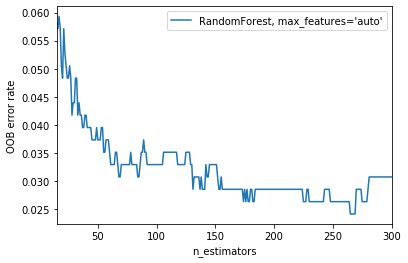

In [25]:
# Mapping classifier name in to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Setting the range of `n_estimators` to explore.
min_estimators = 15
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators = i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label = label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

Comment: The OOB error rate is not necesarily the lowest at 300 (n_estimators). So the GridSearch show us that the best score is at 300, but not necessarily it is at the lowest OOB error rate. 

## 3) Train a Gradient Boosting classifier

    a) Perform Gridsearch to select the optimal hyperparameters for the following
        i) No of trees ii) max depth
    b) What are the effects of regularization on this model? Explain your observations.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
param_distribution = {'n_estimators': [15, 300], 'max_depth' : [4,5,6,7,8,9,10]}

In [28]:
GB = GradientBoostingClassifier(random_state = 50)

In [29]:
clf2 = GridSearchCV(GB, param_distribution)
clf2.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [30]:
print("The best Gradien Booster Parameters: {}".format(clf2.best_params_))
print("The best score is {}".format(clf2.best_score_))

The best Gradien Booster Parameters: {'max_depth': 4, 'n_estimators': 15}
The best score is 0.9560439560439561


Comment: The best Gradient Booster Parameters are at max_depth = 4, and n_estimators = 300, which it gives us a score of 96%.

Answer to B: The effects of regularization in the Gradient Booster models is that it will improve the overall results of Gradient Boosting. In other words, it can penalized Learning,by adding L1 and L2 regularizations, therefore prevent overfitting and improve the performance of the model. 

## 4) Compare the performance for the above algorithms (using tuned settings above) on the test data.
    a) Report on the all performance metrics as described in Assignment 1
    b) Which are the most predictive features in the data?
    c) How do your observations change with and without applying PCA on the data


In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

import seaborn as sns
import matplotlib.pyplot as plt

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [ ]:
# Renaming the values in the second column to 1 and 0 for Benign or Malign, respectively.

y_train_final = pd.get_dummies(y_train)
y_train_final.drop(columns = 'B', inplace = True)
y_train_final.head()

y_test_final = pd.get_dummies(y_test)
y_test_final.drop(columns = 'B', inplace = True)
y_test_final.head()

In [ ]:
def fit_predict_score(name,clf):
    # Setting up graph data
    clf.fit(x_train, np.ravel(y_train_final))
    predicted = clf.predict(x_test)
    labels = [1, 0]
    cm = metrics.confusion_matrix(y_test_final, predicted, labels)
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    ax.set_xticklabels([''] + labels) 
    ax.set_yticklabels([''] + labels) 
    fig.colorbar(cax) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    accuracy = np.round(metrics.accuracy_score(y_test_final , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test_final, clf.predict_proba(x_test)[:,1])
    result_roc_auc = roc_auc_score(y_test_final, clf.predict(x_test))
    plt.figure()
    
    plt.plot(fpr, tpr, marker = '.', label = name + " (Sensitivity -%0.3f)" % result_roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.xlim([-0.1, 1.05])

    # Graph Title
    plt.title('ROC Plot')
    
    # Graph Axis Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Show legend on graph.
    plt.legend()
    
    # Show plot on graph.
    plt.show()
    
    # Precision -Recall Curve in Python
    lr_precision, lr_recall, _ = precision_recall_curve(y_test_final, clf.predict_proba(x_test)[:, 1])
    lr_f1, lr_auc = f1_score(y_test_final, predicted), auc(lr_recall, lr_precision)
    
    # Summarizing scores.
    print(name + 'f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    
    # Plotting the precision-recall curves.
    plt.plot(lr_recall, lr_precision, marker = '.', label = name)
    
    # Graph Axis Labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    # Show legend on graph.
    plt.legend()
    
    # Show plot on graph.
    plt.show()

In [ ]:
clf0 = RandomForestClassifier(max_depth = 6, max_features = "auto", min_samples_split = 5, random_state = 50)
clf1 = GradientBoostingClassifier( max_depth = 4, n_estimators = 300, random_state = 50)

names = ["Random Forest Classifier", "Gradient Boosting Classifier"]
classifiers = [clf0, clf1]

for name, clf in zip(names, classifiers):
    fit_predict_score(name,clf)

Comments: Both classifiers The Random Forest and the Gradient Boosting classifier are doing a relatively good job at predicting the type of cancer, based on the accuracy. However, we need to remember that is a relatively imbalanced dataset, therefore we cannot only look at the accuracy score of the models, but look at the precision-recall curve and the F1 score which takes both (precision and recall into account). By looking at the F1 score I can determine that Random Forest (F1 = 0.923) is doing a better job than Gradient Boosting Classifier (F1=0.914).

b) The most predictive feature in the dataset is:

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Loading data
x_predictors = main_data.values
y_target = target.values


# Extracting feature.
model = ExtraTreesClassifier(n_estimators = 300)
model.fit(x_predictors, y_target)
print(model.feature_importances_)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index = main_data.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

Comment: The most predictive feature in the dataset is v8, with an importance of 10.47% in the Importance Feature, followed by v21 with 10% of Variable Function Importance.

c) Now, If I apply PCA to my main data we get the following differences:

In [ ]:
from sklearn import decomposition

In [ ]:
# Using only 1 component explains 98% of the variance in my data, which is good enough! 
pca = decomposition.PCA(n_components = 1)
trans = pca.fit(main_data).transform(main_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

In [ ]:
# Using 2 components explains 99% of my variance in my data, which is even better!
pca = decomposition.PCA(n_components = 2)
trans = pca.fit(main_data).transform(main_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

In [ ]:
# Since I get more explanation concerning the variance of my data with the latter I have decided to continue with 2 components.

In [ ]:
trans.shape # We have a total of 569 observations and 2 principal components, which is good!

In [ ]:
# Splitting lower dimensional transformed data into training and test sets.
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(trans, target, test_size = 0.2, random_state = 50)

In [ ]:
y_train_final_pca = pd.get_dummies(y_pca_train)
y_train_final_pca.drop(columns = 'B', inplace = True)
y_train_final_pca.head()

y_test_final_pca = pd.get_dummies(y_pca_test)
y_test_final_pca.drop(columns = 'B', inplace = True)
y_test_final_pca.head()

In [ ]:
# Performing Grid Search, using the best parameters for random forest, but with PCA.

clf2 = GridSearchCV(RF, param_dist)
clf2.fit(x_pca_train, y_pca_train)

In [ ]:
print("The best Random Forest Parameters: {}".format(clf2.best_params_))
print("The best score is {}".format(clf2.best_score_))

In [ ]:
GB = GradientBoostingClassifier(random_state=50)
clf3 = GridSearchCV(GB, param_distribution)
clf3.fit(x_pca_train, y_pca_train)

In [ ]:
print("The best Gradient Boosting Parameters: {}".format(clf3.best_params_))
print("The best score is {}".format(clf3.best_score_))

In [ ]:
def fit_predict_score_2(name,clf):
    clf.fit(x_pca_train, np.ravel(y_train_final_pca))
    predicted = clf.predict(x_pca_test)
    labels = [1, 0]
    cm = metrics.confusion_matrix(y_test_final_pca, predicted, labels)
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm) 
    ax.set_xticklabels([''] + labels) 
    ax.set_yticklabels([''] + labels) 
    fig.colorbar(cax) 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    accuracy = np.round(metrics.accuracy_score(y_test_final_pca, predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test_final_pca, clf.predict_proba(x_pca_test)[:,1])
    result_roc_auc = roc_auc_score(y_test_final_pca, clf.predict(x_pca_test))
    plt.figure()
    plt.plot(fpr, tpr, marker = '.', label = name + " (Sensitivity -%0.3f)" % result_roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.xlim([-0.1, 1.05])

    # Graph Title
    plt.title('ROC Plot')
    
    # Graph Axis Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Show legend on graph
    plt.legend()
    
    # Show plot on graph
    plt.show()
    
    # Precision -Recall Curve in Python
    lr_precision, lr_recall, _ = precision_recall_curve(y_test_final_pca, clf.predict_proba(x_pca_test)[:, 1])
    lr_f1, lr_auc = f1_score(y_test_final_pca, predicted), auc(lr_recall, lr_precision)
    
    # Summarizing scores.
    print(name + 'f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    
    # Plotting the precision-recall curves.
    plt.plot(lr_recall, lr_precision, marker='.', label=name)
    
    # Graph Axis Labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    # Show legend on graph
    plt.legend()
    
    # Show plot on graph
    plt.show()

In [ ]:
# If we reapply this to my two classification methods, it results in the following.

clf2 = RandomForestClassifier(max_depth = 8, max_features = 'auto', min_samples_split = 10, n_estimators = 15, random_state = 50)
clf3 = GradientBoostingClassifier( max_depth = 5, n_estimators = 15, random_state = 50)

names = ["Random Forest Classifier with PCA", "Gradient Boosting Classifier with PCA"]
classifiers = [clf2, clf3]

for name, clf in zip(names, classifiers):
    fit_predict_score_2(name,clf)


Comments: The main difference in PCA compared to non-PCA is the n-estimators for the PCA data is 15, compared to 300 in the non-PCA. In the PCA we use  2 Principal Components that explain 99% of the variance of my dataset. Similarly, to the results with no PCA, Random Forest seems to be the best option in predicting the Type of Breast Cancer, and for this dataset due that  it has a higher F1-Score (Precisio-Recall Curve), and higher accuracy as well. The accuracy numbers seems to be lower in PCA than the one without PCA. 

## Implement a stacked architecture for the breast cancer prediction problem. The objective is to combine non-homogenous learners in multiple layers to improve your prediction. Summarize your observations. Add a diagram that explains your stacked design.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
main_data.shape

In [ ]:
target.head()

y = pd.get_dummies(target)
y.drop(columns = 'B', inplace = True)
y.head()

In [ ]:
y2 = np.array(y)
y3 = y2.flatten()

In [ ]:
y3.shape

In [ ]:
# Creating base learners.
base_learners = [('dt_1', DecisionTreeClassifier()), ('knn_1', KNeighborsClassifier(n_neighbors = 5))]


# Initializing Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators = base_learners, final_estimator = LogisticRegression())

# Extracting score
x_train, x_test, y_train, y_test = train_test_split(main_data, y3, stratify = y, random_state = 50)
clf.fit(x_train, y_train).score(x_test, y_test)

In [ ]:
# Creating learners per layer
layer_one_estimators = [('dt_1', DecisionTreeClassifier()), ('knn_1', KNeighborsClassifier(n_neighbors = 5))]
layer_two_estimators = [
                        ('gb_2', GradientBoostingClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators = 50, random_state = 42))
                       ]
layer_two = StackingClassifier(estimators = layer_two_estimators, final_estimator = LogisticRegression())

# Creating final model.
clf = StackingClassifier(estimators = layer_one_estimators, final_estimator = layer_two)

x_train, x_test, y_train, y_test = train_test_split(main_data, y3, stratify = y, random_state = 50)
clf.fit(x_train, y_train).score(x_test, y_test)

In [ ]:
x_train.shape

In [ ]:
%%html
<img src='Diagram_homework2.png'/>

Comment: So the initial training data has 426 observations and 30 columns. There are two different models: decision tree and KNN that are trained on X beforehand. Each model (Decision Trees and KNN) provides a 'y', that is then cast it to the second level training data, which is now m x 2. Second level models (Random Forest and Gradient Boosting), can then be trained on this data (output of the first models) to produce the final outcomes which will be used predictions. The second model is used to make predictions on an OOS test set.